<a href="https://colab.research.google.com/github/Maulcepling20/Klasifikasi-Golongan-UKT-dengan-Metode-Multilayer-Perceptron-dan-Algoritma-Backpropagation/blob/main/SCRIPT_PENELITIAN_FIXX_BANGTTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##A. IMPORT DATA

Import data ini berisikan inputasi data mentah, menampilkan data dalam bentuk tabel, dan mendefinisikan untuk variabel kategorikal dan variabel numerikal

####1. Inputasi Data Mentah

In [ ]:
import pandas as pd

df = pd.read_excel('Data_mahasiswa_unnes_2024_data mentah.xlsx')

selected_columns = [
   "Pendapatan Keluarga per Bulan", "Pekerjaan Orang Tua/Wali", "Pendidikan Orang Tua/Wali", "Riwayat Bantuan Pendidikan", "Status Keberadaan Ayah",
   "Status Keberadaan Ibu", "Status Kepemilikan Tempat Tinggal", "Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar", "Bahan Atap Rumah",
   "Bahan Tembok Rumah", "Bahan Lantai Rumah", "Rerata Pengeluaran Listrik & Air per Bulan", "Total Hutang", "Cicilan Hutang per Bulan", "Jalur Masuk", "Golongan UKT",
]


####2. Menampilkan data mentah dalam bentuk tabel

In [ ]:
#ambil 100 data pertama sebagai sampel untuk di tampilkan
df_selected = df[selected_columns]
df_sample = df_selected.head(100)
print("\n=== Dataset Mahasiswa UNNES 2024 ===")
print(df_sample.to_string(index=False))


=== Dataset Mahasiswa UNNES 2024 ===
 Pendapatan Keluarga per Bulan Pekerjaan Orang Tua/Wali Pendidikan Orang Tua/Wali Riwayat Bantuan Pendidikan Status Keberadaan Ayah Status Keberadaan Ibu Status Kepemilikan Tempat Tinggal  Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar            Bahan Atap Rumah             Bahan Tembok Rumah       Bahan Lantai Rumah  Rerata Pengeluaran Listrik & Air per Bulan  Total Hutang  Cicilan Hutang per Bulan Jalur Masuk  Golongan UKT
Rp 3.000.000 s.d. Rp 4.000.000            Tidak Bekerja             SMP Sederajat                        NaN                  Hidup             Meninggal                     Milik Sendiri                                                      27000000          genting tanah liat                     bata merah                  keramik                                      347768             0                         0        SNBP           4.0
Rp 3.000.000 s.d. Rp 4.000.000               Wiraswasta             SMP Se

In [ ]:
#Sampel ditampilkan dalam bentuk data agar lebih estetik gesss
from IPython.display import display, HTML

df_sample = df[selected_columns].head(100)

#style HTML
display(HTML('<h3 style="text-align:center;">Dataset Mahasiswa UNNES 2024 </h3>'))
styles = [
    dict(selector="table", props=[("border", "1px solid black"), ("border-collapse", "collapse")]),
    dict(selector="th", props=[("border", "1px solid black"), ("padding", "5px")]),
    dict(selector="td", props=[("border", "1px solid black"), ("padding", "5px")]),
]
styled_df = df_sample.style.set_table_styles(styles)
display(styled_df)


,Pendapatan Keluarga per Bulan,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Riwayat Bantuan Pendidikan,Status Keberadaan Ayah,Status Keberadaan Ibu,Status Kepemilikan Tempat Tinggal,Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Jalur Masuk,Golongan UKT
0,Rp 3.000.000 s.d. Rp 4.000.000,Tidak Bekerja,SMP Sederajat,nan,Hidup,Meninggal,Milik Sendiri,27000000,genting tanah liat,bata merah,keramik,347768,0,0,SNBP,4.000000
1,Rp 3.000.000 s.d. Rp 4.000.000,Wiraswasta,SMP Sederajat,nan,Hidup,Meninggal,Milik Sendiri,8000000,Seng,bata ringan/hebel,keramik,200000,15600000,650000,SNBP,4.000000
2,Rp 1.000.000 s.d. Rp 2.000.000,Tidak Bekerja,SMA Sederajat,nan,Hidup,Hidup,Menumpang,17000000,beton satu tingkat,Bata press,keramik,98000,29260000,836000,SNBP,4.000000
3,Rp 4.000.000 s.d. Rp 5.000.000,Tidak Bekerja,SMA Sederajat,nan,Hidup,Hidup,Milik Sendiri,13000000,Genting,Batu bata,Keramik,142600,0,0,SNBP,4.000000
4,lebih dari Rp 5.000.000,Pegawai Swasta,S1/D4,nan,Hidup,Hidup,Milik Sendiri,15000000,Genting,Batu Bata,Keramik,250000,33000000,1400000,SNBP,4.000000
5,lebih dari Rp 5.000.000,Pegawai Pemerintahan,SMA Sederajat,nan,Hidup,Hidup,Milik Sendiri,85000000,Genting,Batu Bata,Keramik,200000,550000000,7000000,SNBP,7.000000
6,Rp 4.000.000 s.d. Rp 5.000.000,Pegawai Swasta,S1/D4,KIPK,Hidup,Hidup,Kontrak,6500000,Seng,semen,keramik,400000,2000000,1382000,SNBP,0.000000
7,Rp 3.000.000 s.d. Rp 4.000.000,Pegawai Swasta,SMP Sederajat,nan,Hidup,Hidup,Menumpang,25000000,genteng tanah liat,batu bata merah,keramik,140000,0,0,SNBP,4.000000
8,Rp 3.000.000 s.d. Rp 4.000.000,Pegawai Swasta,D3/D2,nan,Hidup,Hidup,Menumpang,20000000,sengroof,batako,keramik,700000,0,0,SNBP,3.000000
9,lebih dari Rp 5.000.000,Pegawai Swasta,SMA Sederajat,nan,Hidup,Hidup,Milik Sendiri,16000000,Spandek,Semen,Keramik,600000,0,0,SNBP,7.000000


##B. Eksplorasi Data (EDA)

Bagian ini merupakan pengecekan data mentah pada dataset yang meliputi pengecekan nilai uniq, invalid value, duplikat value, pengecekan missing value, dan pengukuran statistik seperti nilai rata-rata, median, dan modus

####1. Pengecekan Nilai Unique

Pengecekan nilai unik bertujuan untuk mengetahui variasi data pada setiap variabel/atribut yang akan digunakan

In [ ]:
#list dulu guys variabel/fitur/atribut yang ada di datasetnya
print("\nKolom dalam df:", df.columns.tolist())

#untuk nilai uniq saya akan tampilkannya yang data kategorik saja ygy
#1. Pendapatan Keluarga
print("\n1.Pendapatan Keluarga:", df["Pendapatan Keluarga per Bulan"].unique())
#2. Pekerjaan Orang Tua/Wali
print("\n2.Pekerjaan Orang Tua/Wali:", df["Pekerjaan Orang Tua/Wali"].unique())
#3. Pendidikan ORang Tua/Wali
print("\n3.Pendidikan Orang Tua/Wali:", df["Pendidikan Orang Tua/Wali"].unique())
#4. Riwayat Bantuan Pendidikan
print("\n4.Riwayat Bantuan Pendidikan:", df["Riwayat Bantuan Pendidikan"].unique())
#5. Status Keberadaan Ayah
print("\n5.Status Keberadaan Ayah:", df["Status Keberadaan Ayah"].unique())
#6. Status Keberadaan Ibu
print("\n6.Status Keberadaan Ibu:", df["Status Keberadaan Ibu"].unique())
#7. Status Kepemilikan Tempat Tinggal
print("\n7.Status Kepemilikan Tempat Tinggal:", df["Status Kepemilikan Tempat Tinggal"].unique())
#8. Bahan Atap Rumah
print("\n8.Bahan Atap Rumah:", df["Bahan Atap Rumah"].unique())
#9. Bahan Tembok Rumah
print("\n9.Bahan Tembok Rumah:", df["Bahan Tembok Rumah"].unique())
#10. Bahan Lantai Rumah
print("\n10.Bahan Lantai Rumah:", df["Bahan Lantai Rumah"].unique())
#11. Jalur Masuk
print("\n11.Jalur Masuk:", df["Jalur Masuk"].unique())
#12 Golongan UKT
print("\n12.Golongan UKT:", df["Golongan UKT"].unique())

#Tapi boong yaaaa, ini yang bagian data numerik
#13. Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar
print("\n13.Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar:", df["Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar"].unique())
#14. Rerata Pengeluaran Listrik & Air per Bulan
print("\n14.Rerata Pengeluaran Listrik & Air per Bulan:", df["Rerata Pengeluaran Listrik & Air per Bulan"].unique())
#15. Total Hutang
print("\n15.Total Hutang:", df["Total Hutang"].unique())
#16. Cicilan Hutan per Bulan
print("\n16.Cicilan Hutang per Bulan:", df["Cicilan Hutang per Bulan"].unique())


Kolom dalam df: ['Pendapatan Keluarga per Bulan', 'Pekerjaan Orang Tua/Wali', 'Pendidikan Orang Tua/Wali', 'Riwayat Bantuan Pendidikan', 'Status Keberadaan Ayah', 'Status Keberadaan Ibu', 'Status Kepemilikan Tempat Tinggal', 'Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar', 'Bahan Atap Rumah', 'Bahan Lantai Rumah', 'Rerata Pengeluaran Listrik & Air per Bulan', 'Total Hutang', 'Cicilan Hutang per Bulan', 'Jalur Masuk', 'Bahan Tembok Rumah', 'Golongan UKT']

1.Pendapatan Keluarga: ['Rp 3.000.000 s.d. Rp 4.000.000' 'Rp 1.000.000 s.d. Rp 2.000.000'
 'Rp 4.000.000 s.d. Rp 5.000.000' 'lebih dari Rp 5.000.000'
 'kurang dari Rp 1.000.000,-' 'Rp 2.000.000 s.d. Rp 3.000.000' 0]

2.Pekerjaan Orang Tua/Wali: ['Tidak Bekerja' 'Wiraswasta' 'Pegawai Swasta' 'Pegawai Pemerintahan'
 'Buruh' 'Petani' 'Nelayan' 0]

3.Pendidikan Orang Tua/Wali: ['SMP Sederajat' 'SMA Sederajat' 'S1/D4' 'D3/D2' 'SD Sederajat' 'S2'
 'Tidak Lulus SD' 'D1' 0 'S3']

4.Riwayat Bantuan Pendidikan: [nan 'KIPK']

5.S

####2. Analisis Invalid Value

Pengecekan Invalid Value bertujuan untuk mengetahui nilai mana saja yang tidak valid sehingga nantinya dapat dilakukan pembersihan pada saat preprocessing data

In [ ]:
# Mari kita pisahkan untuk data kategorik dan data numeriknya gesss
# Yang ini data Kategorik
data_kategorik = {
    "Pendapatan Keluarga per Bulan": [0],
    "Pekerjaan Orang Tua/Wali": [0],
    "Pendidikan Orang Tua/Wali": [0],
    "Status Keberadaan Ayah": [1],
    "Status Keberadaan Ibu": [1],
    "Status Kepemilikan Tempat Tinggal": [0],
    "Bahan Atap Rumah": [0, 116, 116000, 130, 310000, 429000, 505000, '429.000', '-', '----', 'Tidak ada'],
    "Bahan Tembok Rumah": [0, '-', '----', 'tidak ada'],
    "Bahan Lantai Rumah": [0, 130, 2, '-', '----', 'tidak ada'],
    "Golongan UKT": [2.4]
}
summary_data_kategorik = []
for col, invalid_vals in data_kategorik.items():
    if col not in df.columns:
        continue
    total_invalid = 0
    found_invalid = []
    for inval in invalid_vals:
        count = 0
        for val in df[col]:
            try:
                if pd.isna(val): continue
                if str(val).strip().lower() == str(inval).strip().lower():
                    count += 1
            except:
                continue
        if count > 0:
            found_invalid.append(inval)
            total_invalid += count

    if total_invalid > 0:
        summary_data_kategorik.append({
            'Atribut': col,
            'Jenis Nilai Invalid': ', '.join(map(str, found_invalid)),
            'Total Nilai Invalid': total_invalid,
            'Jumlah Data': len(df[col])
        })

# Yang ini data numerik
data_numerik = {
    "Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar": 7,
    "Rerata Pengeluaran Listrik & Air per Bulan": 6,
    "Total Hutang": 5,
    "Cicilan Hutang per Bulan": 4
}
summary_data_numerik = []
for col, min_digits in data_numerik.items():
    if col not in df.columns:
        continue
    total_invalid = 0
    for val in df[col]:
        try:
            if pd.isna(val): continue
            val_int = int(str(val).replace('.', '').replace(',', '').replace(' ', ''))
            if val_int != 0 and len(str(val_int)) < min_digits:
                total_invalid += 1
        except:
            total_invalid += 1

    if total_invalid > 0:
        summary_data_numerik.append({
            'Atribut': col,
            'Angka yang invalid': f"< {min_digits} digit (≠0)",
            'Total Nilai Invalid': total_invalid,
            'Jumlah Data': len(df[col])
        })

# Pint gesss prinnttt hasilnyaa
if data_kategorik:
    summary_df1 = pd.DataFrame(summary_data_kategorik)
    print("\n=== Ringkasan Invalid Value pada Data Kategorik ===")
    print(summary_df1.to_string(index=False))

if data_numerik:
    summary_df2 = pd.DataFrame(summary_data_numerik)
    print("\n=== Ringkasan Invalid Value pada Data Numerik ===")
    print(summary_df2.to_string(index=False))



=== Ringkasan Invalid Value pada Data Kategorik ===
                          Atribut                                                      Jenis Nilai Invalid  Total Nilai Invalid  Jumlah Data
    Pendapatan Keluarga per Bulan                                                                        0                  124        37977
         Pekerjaan Orang Tua/Wali                                                                        0                  117        37977
        Pendidikan Orang Tua/Wali                                                                        0                  117        37977
           Status Keberadaan Ayah                                                                        1                  117        37977
            Status Keberadaan Ibu                                                                        1                  117        37977
Status Kepemilikan Tempat Tinggal                                                                    

Oh iya untuk pengecekan invalid value, untuk variabel kategorik "Jalur Masuk" dan "Riwayat Bantuan Beasiswa" itu tidak dicantumkan karena pada variabel terseut tidak terdapat nilai yang tidak valid untuk dianalisis

####3. Analisis Duplicate Value

Pengecekan Duplicate Value ini bertujuan untuk memudahkan pada saat melakukan label encoding pada bagian preprocessing data, terutama pada data kategorikal

In [ ]:
# Pisahkan dulu untuk variabel kategorik dan numerik
# Variabel Kategorik
data_kategorik_duplikat = {
    "Pekerjaan Orang Tua/Wali": {
          "Tidak Bekerja"       : ['Tidak Bekerja', 'tidak bekerja', 'Tidak bekerja', 'tidak Bekerja'],
          "Pegawai Pemerintahan":  ['Pegawai Pemerintahan', 'pegawai pemerintahan', 'pegawai Pemerintahan', 'Pegawai pemerintahan'],
          "Pegawai Swasta"      : ['Pegawai Swasta', 'pegawai swasta', 'Pegawai swasta', 'pegawai Swasta']
    },

    "Pendidikan Orang Tua/Wali": {
        "SD"   : ['SD', 'Sd', 'sD', 'Sekolah Dasar', 'sekolah dasar'],
        "SMP"  : ['SMP', 'SmP', 'SMp', 'MP', 'Sekolah Menengah Pertama', 'sekolah menengah pertama'],
        "SMA"  : ['SMA', 'sma', 'SmA', 'sMA', 'SMa', 'Sma', 'sMa', 'smA', 'Sekolah Menengan Atas', 'sekolah menengah atas'],
        "D1"   : ['D1', 'd1', 'Diploma 1', 'Diploma Pertama'],
        "D3/D2": ['D3/D2', 'd3/d2', 'd3/D2', 'D3/d2'],
        "S1/D4": ['S1/D4', 's1/d4', 'S1/d4', 's1/D4'],
        "S2"   : ['S2', 's2', 'Strata 2'],
        "S3"   : ['S3', 's3', 'Strata 3'],
    },

    "Riwayat Bantuan Pendidikan": {
        "Tidak Ada Riwayat Bantuan": ['Null', 'NUll', 'NULL', 'nuLL'],
        "KIPK"                     : ['KIPK', 'Kipk', 'KiPK', 'kipk']
    },

    "Status Kepemilikan Tempat Tinggal": {"Milik Sendiri": ['Milik Sendiri', 'milik sendiri', 'Milik sendiri', 'milik Sendiri']},

    "Bahan Atap Rumah": {
        "Genting": ["genting", "genteng", "genting tanah liat", "gendeng", "geneng", "atap gendeng bahan tanah liat",
                    "atap genteng tanah liat", "atap tanah liat", "dari genteng", "ganteng", "gendeng/genting",
                    "genteng ( tanah liat )", "genteng atap", "genteng bata", "genteng bekas", "genteng berbahan tanah liat",
                    "genteng biasa", "genteng dan dag", "genteng dari tanah liat", "genteng liat", "genteng merah",
                    "genteng merah tanah liat", "genteng plentong", "genteng tanah", "genteng tanah liah",
                    "genteng tanah liat", "genteng tanah liat", "gentep, gentheng", "genting", "genting (tanah liat)",
                    "genting biasa", "genting dari tanah", "genting dari tanah liat", "genting kualitas buruk",
                    "genting tahan liat", "genting tanah", "genting tanah iat", "genting(tanah liat)", "genting, tanah liat",
                    "genting/ tanah liat", "gentling", "geting", "geting tanah liat", "ginteng tanah liat", "kenteng",
                    "renteng, tanah", "tanah liat", "tanah  liat", "tanah liat (genting)", "tanah liat/genting"],
        "Asbes & Genting": ["asbes & genteng", "asbes dan genteng", "asbes, gendeng", "asbes, genting", "esbes dan genteng",
                            "ganteng dan asbes", "genteng & asbes", "genteng + asbes", "genteng dan asbes", "genteng dan seng",
                            "genteng tanah liat dan sebagian asbes", "genteng tanah liat, dan asbes", "genteng, seng, dan asbes",
                            "genteng/asbes", "genting asbes", "genting dan asbes", "genting dan seng",
                            "genting tanah liat dan asbes", "genting tanah liat dan seng", "genting tanah liat, bgian teras asbes",
                            "genting, asbes", "genting, seng dan asbes", "genting,asbes", "genting/asbes",
                            "sebagian genting tanah liat dan asbes", "seng dan genteng", "seng dan genting tanah liat",
                            "seng dan tanah liat", "baja ringan dan genteng", "galvalum dan genting",
                            "genteng tanah liat dan gavalum"],
        "Kayu & Genting": ["bambu tanah liat", "bambu, kayu dan genting tanah liat", "genteng dan bambu", "genteng dan kayu",
                           "genteng kayu", "genting kayu", "genting tanah liat dan kayu", "kayu dan genteng",
                           "kayu kelapa,bambu,genting tanah liat.", "kayu/atap genteng", "kayu/genting tanah"],
        "Asbes"         : ["asbes", "asbes dan seng", "asbes dan spandek", "asbes gelombang kecil", "asbes/seng", "asbese",
                           "atap asbes", "baja ringan", "esbes", "galfalum", "galvalum", "seng", "seng 5x10(1 sisi), paku seng, dan seng plat",
                           "seng atau asbes", "seng dan asbes", "seng gelombang", "seng metal", "seng/asbes", "seng/blink", "spandek", "zeng"],
        "Asbes & Beton" : ["asbes dan beton", "asbes dan genteng cor", "beton dan asbes"],
        "Beton"         : ["atap beton", "batako", "beton", "corcor an", "dak", "dak beton", "genteng beton",
                            "genteng beton berwarna", "genting beton"],
        "Kayu/Bambu"    : ["bambu", "bambu/gribig", "daun rumbia", "kayu", "tripleks"],
        "Ternit dan Bambu": ["ternit dan ayaman bambu"],
        "Ternit"          : ["eternit", "genteng metal pasir", "genting sintetis", "multiroof", "plafon", "seng pasir"],
        "Seng & Kayu"     : ["seng dan sirap kayu", "seng dan tripleks"],
        "Genting & cor"   : ["setengah genteng setengah cor"]
    },

    "Bahan Tembok Rumah": {
        "Bambu": ["Anyaman bambu", "Bahan kayu(bilik)", "bilik", "BILIK BAMBU", "Bambu", "Bambu dan Kayu", "KAYU", "kayu (bilik)",
                  "Kayu / anyaman bambu", "KAYU atau TRIPLEK", "Kayu / papan", "kayu biasa", "KAYU DAN ANYAMAN BAMBU", "Kayu dan Gedek",
                  "kayu dan papan", "Kayu papan", "Kayu.", "Kayu/bilik", "Kayu/papan", "Pagar Kayu", "Papan", "Papan /kayu",
                  "papan atau kayu", "papan kayu", "Papan/kayu", "Triplek", "Triplek Kayu", "Tepas", "Bilik Kayu", "Bilik/ kayu"],
        "Kalsiboard": ["ASBAS", "GRC", "Kayu dan Kalsiboard", "KAYU/KALSIBOT", "KARSIBOT", "Seng", "KASEBOTH", "kasibot",
                       "hardbord atau kasebot", "Harplek", "Semen dan seng", "Dinding & asbes", "asbes"],
        "Bata Merah" : ["bata", "batu bata, dan semen", "Batu bata, Pasir, Semen", "Batu bata, semen", "Batu bata, semen,pasir",
                        "Batu bata,pasir, dan semen", "batu bata,pasir ,dan semen", "batu bata,semen dan pasir", "Batu bata,semen,pasir",
                        "BATU BATA/ SEMEN", "BatuBata dan Semen", "Batu-bata dan semen", "batubata, semen, dan pasir", "semen, batu bata, pasir",
                        "Batubata+Semen", "DARI BATU BATA DAN PASIR", "bata merah", "Bata tanah", "bata tanah merah", "batu bata",
                        "batu - bata", "BATU BATA MERAH", "Batu Bata (dinding)", "Batu Bata / Bata Merah", "BATU BATA BIASA", "Batu bata merah",
                        "Bata dan semen", "bata merah, pasir, dan semen", "bata semen", "Bata, semen", "batu bata dan semen", "pasir, bata, semen",
                        "bata merah, pasir dan semen", "batu bata merah dan semen", "Semen", "semen , batu bata, pasir", "semen bata",
                        "Semen dan batu bata", "Semen dan Batu Tela", "Semen dan pasir", "Semen Bata Merah", "SEMEN BATU BATA",
                        "Semen, bata", "Semen Batu Bata", "Semen dan bata", "Batu bata & Semen", "Batu bata , semen", "tanah liat dan semen",
                        "Batu bata merah, semen", "batu bata semen", "batu bata semen pasir", "batubata", "batu-bata", "Dinding Bata",
                        "Dinding batu bata", "Dinding dari batu bata", "Pasangan bata", "SEMEN/BATA", "Semen/Batu bata", "Tembok Bata",
                        "tembok bata semen", "TEMBOK BATU BATA SEMEN", "TEMBOK BATU BATA", "Pasir, kapur, Semen, Bata", "pasir,batu bata",
                        "semen, pasir, dan batu bata", "semen,bata", "semen,batu bata", "semen.bata", "Semen/ batu bata", "pasir/ batubata",
                        "bata merah keliling", "Batu Bata/Batu merah", "Batu bata/ Bata merah", "Batu bata, Semen, pasir", "Batubata merah"],
        "Bata Merah & Kayu": ["Dinding dan kayu usang", "Batu bata, pasir, semen, dan kayu", "Bata & kayu", "Bata dan kayu", "bata dan triplek",
                              "bata merah dan kayu", "bata merah, kayu", "Separuh tembok separuh bilik kayu", "Batu bata dan bambu", "batu bata dan bilik",
                              "Batu bata dan gethek dari bambu", "Batu bata dan kayu", "Batu bata dan kayu randu", "Papan dan batu", "triplek dan batu bata",
                              "semen dan triplek", "Batu bata dan papan", "kayu campur beton", "Kayu campuran", "kayu dan batako",
                              "kalsibot, gribik, dan tembok sebagian sedikit", "Batu bata,Seng,Kayu", "Batu bata dan Papan kayu", "Batu bata dan tripleks",
                              "batu bata merah dan kayu", "Batu dan papan (semi permanen)", "Bilik dan tembok", "Semen, batu bata, dan geribik",
                              "Bata semen, dan kayu", "Kayu (papan/dabak) dan Bata", "kayu dan batu bata", "kayu dan bata merah", "Kayu dan bata",
                              "sebagian kayu dan sebagian tembok", "Kayu, Dinding", "Kayu,dinding", "KAYU DAN TEMBOK", "Papan dan Bata",
                              "Tembok (bata merah) dan kayu", "Batako dan papan", "tembok , kayu dan triplek", "Tembok bata dan nilik",
                              "Tembok dan kayu", "setengah tembok", "batu bata,batako,dan papan", "TEMBOK DAN TRIPLEK",
                              "Batako, Batu, Kayu, dan Bambu", "triplek dan batu bata"],
        "Tembok Sempurna (di cat)": ["TEMBOK PERMANEN", "Tembok dicat", "Tembok Dinding", "Tembok", "Dinding Dicat", "Batu Bata di cat",
                                     "DI CAT TETAPI WARNA SUDAH PUDAR", "Dinding tembok di cat", "Dinding yang dicat", "Diplester dan dicat rapi",
                                     "Batu bata, plester, bercat", "BATU BATA, PLESTER, CAT", "batu bata, semen, cat", "dinding", "Dinding biasa",
                                     "Plester di cat", "Plester dicat rapi", "PLESTERAN DI CAT RAPI", "semen di cat", "Campur", "Campuran",
                                     "cat dan plester", "cat dan plesteran", "Semen dan dicat", "Plaster dan cat", "marbel", "Plester dan cat",
                                     "plester dan dicat rapi", "DIPLESTER DAN DICAT", "Plester dan sudah dicat"],
        "Batu Bata Merah & Batu Lain": ["BATA dan BATAKO", "Semen, batu-bata, gampling, kapur", "Sebagian batu bata dan batu ringan", "gamping dan bata",
                                        "BATU BATA DAN BATAKO", "Bata Merah dan Hebel", "BATU BATA DAN HEBEL", "Batu bata dan herbel"],
        "Batu Biasa"                 : ["Batu Bata Gamping", "Batu Batu", "Batu", "batu alam semen pasir", "pasir", "Pasir dan semen", "Tanah",
                                        "Tanah, pasir, dan semen", "Pasir Kapur", "semen Kapur", "semen pasir", "Semen, pasir", "SEMEN SEADANYA",
                                        "Pasir, semen"],
        "Batako"                     : ["BATU BATAKO", "Bataco", "batako", "batako tidak di cat", "batu bata/ batako", "Tembok batako", "Dinding (Batako)",
                                        "Dinding batako", "Batako dan semen", "batako,semen"],
        "Bata + Plester":  ["batu bata sudah di semen", "Dinding diplester", "dinding plaster", "dinding plester", "DINDING SEMEN", "diplester",
                            "Pelester", "batako plester", "plaser", "Plaster", "plaster/aci", "SEMEN DI PLESTER", "semen diplaster",
                            "SEMEN PLESTER", "Semen halus", "plasteran", "plester", "Tembok\\semen", "Tembok,Semen, Diplester",
                            "TEMBOK BATU BATA SEMEN", "TEMBOK PLESTER", "Tembok semen", "tembok sudah di plester", "diplester setengah",
                            "Batako di Plester", "lepo", "batu bata dan di plaster", "Batu bata dan di plester", "semi permanen", "cor",
                            "Plester biasa", "plester dan batu bata", "plester dan papan", "Plester pasir", "Plesteran", "plster", "Selkom",
                            "Bata merah,plester, aci", "bata plaster semen", "Bata Plester", "bata, semen, plaster", "Lainnya", "batu bata plesteran",
                            "batu bata, tanah plesteran", "Batu bata, diplester", "BATU BATA/PLESTER"],
        "Bata Putih":      ["SEMEN DAN HEBEL", "hebel", "HERBEL", "Herbel/batu bata", "Bata HERBEL", "Bata Putih", "Batu bata putih",
                            "Bata Ringan", "Bata ringan atau Herbel", "Bata ringan putih/hebel", "BATU HEBEL"],
        "Beton + Semen":   ["Beton", "Beton/Semen", "beton/semen", "semen / beton", "Dinding beton", "Semen beton", "semen/ beton",
                            "Semen/Beton", "SETENGAH BETON"],
        "Bata Merah dan Kalsiboard": ["Bata dan Kasibot", "Bata Merah dan GRC Board", "Bata ringan, bata putih, dan kasebot", "Batu Bata dan Kalsibot",
                                      "Batu bata dan kalsibot"],
        "Plester + Bambu/Kayu":      ["Tembok plester dan anyaman bambu", "kayu/plester", "kayu dan semen", "kayu/plester"]
    },

    "Bahan Lantai Rumah":{
        "Jubin": ['Keramik dan jubin', 'Biasa', 'kedap air', 'Keramik biasa', 'keramik di ruang tamu saja', 'Keramik Lama', 'keramik lawas',
                  'keramik pecah pecah', 'Keramik polos', 'keramik putih', 'KERAMIK RENDAH', 'keramik sederhana', 'DARI KERAMIK', 'pc',
                  'keramik', 'PORSELEN/KERAMIK', 'Satu', 'Lantai keramik', 'Kramik sederhana', 'Lanta keramik', 'lantai', 'LANTAI BIASA',
                  'KERAMIN', 'kermaik', 'kramik', 'jubin', 'Kramik biasa', 'Keramik/Lantai', 'Setengah keramik setengah joben',
                  'Keramik tegel', 'keramik ubin', 'Keramik ubin', 'Keramik/ubin', 'Keramik & Ubin', 'Keramik, ubin', 'Keramik (ubin)'],
        "Kayu dan Keramik": ['kayu bagian dalam ,dan keramik bagian teras rumah', 'Keramik dan kayu', 'Keramik dan mester'],
        "Keramik dan Batu Bata": ['KERAMIK DAN BATU BATA', 'Keramik dan batubata', 'Keramik dan paving'],
        "Keramik dan Semen": ['Keramik dan Semen', 'Keramik dan Plaster', 'Keramik dan Plaster semen', 'Keramik dan Plester', 'Keramik dan plester semen',
                              'Keramik dan plesteran', 'Keramik dan Semen', 'Keramik dan semen plester', 'Keramik & plester', 'plester atau keramik',
                              'kramik dan plaster', 'plaster dan keramik', 'plaster dan kramik', 'plaster dan lantai keramik', 'keramik, ubin, plester, dan tanah',
                              'Keramik,Plester,Tanah', 'Plester, keramik, dan tanah', 'plester ,keramik', 'Kramik dan plester', 'Kramik dan plesteran',
                              'Ubin dan semen', 'Keramik,Plester', 'Sebagian keramik dan sebagian plester kasar', 'Keramik dan cor',
                              'keramik dan dan lantai plaster kasar', 'Keramik plaster', 'Keramik, Semen, Tanah', 'Keramik, plester, tanah',
                              'KERAMIK DAN DIPLASTER', 'Sebagian keramik, sebagian plester dan tanah', 'semen dan keramik', 'semen dan kramik',
                              'keramik/plester', 'lantai di plester semen', 'plester dan keramik biasa', 'Plester dan Keramik'],
        "Keramik/Ubin/Jubin dan Tanah": ['keramaik dan tanah merah', 'keramik, ubin, tanah', 'Keramik, Tanah', 'keramik dan tanah', 'ubin dan tanah',
                                         'Keramik Tanah liat', 'Keramik dan tanah liat', 'Keramik dan Tanah', 'Keramik+Tanah', '1/2 masih tanah,1/2 kramik',
                                         'Keramik & tanah', 'Kramik dan tanah'],
        "Jubin+Tegel":    ['SEBAGIAN KRAMIK DAN TEGEL', 'tegel dan keramik', 'KERAMIK DAN TEGEL'],
        "Plester":        ['lantai diplester tanpa keramik', 'ACIAN DAN RETAK', 'PLESTER dan PECAH PECAH', 'Plester dari semen', 'cor semen',
                           'Cor/Plaster', 'coran', 'Plester pecah pecah', 'Plester sebagian', 'plesteran', 'Plesteran biasa', 'Plesteran semen',
                           'plester semen', 'Plaster kasar', 'plaster semen', 'plaster/semen', 'plasteran', 'Plester', 'diplester', 'FLUR SEMEN',
                           'Plester biasa', 'pelester', 'Pelur', 'Pelur Semen', 'peluran', 'peluran pasir dan semen', 'Plaster', 'screed',
                           'Sudah diplester kasar', 'semen dan pasir', 'Semen diplester', 'SEMEN KASAR', 'semen pasir', 'Semen plaster',
                           'Semen Plester', 'semen tidak di plester', 'Semen yang sudah di plester', 'Beton', 'beton/semen', 'Semen/plester',
                           'semen', 'Semen (Plaster)', 'Semen / Plesteran', 'SEMEN ATAU LANTAI', 'Semen cor', 'Mester/Plaster',
                           'LANTAI PLASTER', 'Lantai Plester', 'pasir,semen, dan pondasi rumah'],
        "Tanah dan Semen": ['Tanah dan semen', 'Pasir dan semen', 'Semen dan Tanah', 'plester (semen dan pasir)', 'plaster tanah dan semen',
                            'Plester dan tanah', 'semen, dan tanah'],
        "Bata merah/Paving + Tanah": ['bata', 'Bata merah', 'paving', 'Paving dan tanah', 'Batu Bata'],
        "Plester dan Tegel": ['Tegel , Semen Plester', 'ubin dan plaster'],
        "Keramik Marmer": ['marmer', 'GRANIT'],
        "Kayu/Papan":     ['Mester', 'jerambah', 'Kayu', 'Kayu atau papan', 'papan', 'Papan Kayu', 'Papan(kayu)', 'Trompo (kayu)'],
        "Tanah":          ['Tanah', 'Tanah (batu kerikil)', 'Pasir Kasar', 'tanah liat', 'TIDAK BERLANTAI', 'Pasir', 'Pasir dan Batu'],
        "Tegel/Ubin":     ['Lantai tegel/ubin', 'Ubin', 'TEGEL', 'Ubin /keramik', 'Ubin keramik', 'ubin kramik', 'Ubin lama', 'UBIN LANTAI',
                           'Ubin Tegel', 'ubin tegel kuning', 'UBIN TRASO', 'UBIN/KERAMIK', 'Tegel abuabu', 'Tegel atau ubin lantai', 'Tehel',
                           'Tekel', 'traso', 'TEKEL LAMA', 'ubin/tegel']
    },

    "Jalur Masuk": {
        "SNBP": ['SNBP', 'SnBP','snbp', 'SNbp', 'snBP'],
        "SNBT": ['SNBT', 'SnBT','snbt', 'SNbt', 'snBT']
    },
}

# Bikin fungsi untuk variabel kategorik
kategorik_dupe_summary = []

for col, group_dict in data_kategorik_duplikat.items():
    if col not in df.columns:
        continue

    for label, synonyms in group_dict.items():
        count = df[col].astype(str).str.strip().str.lower().isin(
            [s.lower().strip() for s in synonyms]
        ).sum()

        if count > 1:
            kategorik_dupe_summary.append({
                'Atribut': col,
                'Kategori Duplikat': label,
                'Total Duplikat': count
            })


# Variabel Kategorik
data_numerik_duplikat = [
    "Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar",
    "Rerata Pengeluaran Listrik & Air per Bulan",
    "Total Hutang",
    "Cicilan Hutang per Bulan",
]

# Bikin fungsi ygy untuk data numerik
numerik_dupe_summary = []
for col in data_numerik_duplikat:
    if col not in df.columns:
        continue
    dupes = df[col][df[col].duplicated(keep=False)]
    if not dupes.empty:
        numerik_dupe_summary.append({
            'Atribut': col,
            'Jumlah Nilai Duplikat Unik': dupes.nunique(),
            'Total Duplikat (Baris)': dupes.shape[0]
        })

# Ini diaa hasil output untuk data kategorik dan numeriknya ygy
if kategorik_dupe_summary:
    summary_df1 = pd.DataFrame(kategorik_dupe_summary)
    print("\n=== Ringkasan Duplikat Value pada Data Kategorik ===")
    print(summary_df1.to_string(index=False))

if numerik_dupe_summary:
    summary_df2 = pd.DataFrame(numerik_dupe_summary)
    print("\n=== Ringkasan Duplikat Value pada Data Numerik ===")
    print(summary_df2.to_string(index=False))



=== Ringkasan Duplikat Value pada Data Kategorik ===
                          Atribut            Kategori Duplikat  Total Duplikat
         Pekerjaan Orang Tua/Wali                Tidak Bekerja            4842
         Pekerjaan Orang Tua/Wali         Pegawai Pemerintahan            5236
         Pekerjaan Orang Tua/Wali               Pegawai Swasta            6545
        Pendidikan Orang Tua/Wali                           D1             152
        Pendidikan Orang Tua/Wali                        D3/D2            1713
        Pendidikan Orang Tua/Wali                        S1/D4            6759
        Pendidikan Orang Tua/Wali                           S2            1112
        Pendidikan Orang Tua/Wali                           S3              65
       Riwayat Bantuan Pendidikan                         KIPK            5908
Status Kepemilikan Tempat Tinggal                Milik Sendiri           29095
                 Bahan Atap Rumah                      Genting           2763

Sama hal nya seperti bagian invalid value, ada beberapa variabel yang tidak dimasukan kedalam pengecekan duplikat value dikarenakan data mentah sudah di cek oleh peneliti dan variabel-variabel yang tidak tertulis pada pencarian duplikat value merupakan variabel yang tidak memiliki duplikat value, baik pada nilai datanya ataupun pada seluruh data pada variabelnya

####4. Pengecekan Missing Value

Tujuan dari pengecekan missing value yaitu untuk mengetahui seberapa banyak nilai kosong pada setiap variabelnya dan pada bagian ini juga akan ditampilkan jumlah data dari setiap variabelnya sebagai pembanding antara jumlah data yang kosong dengan jumlah data keseluruhan. Dan bagian ini juga bertujuan untuk mempermudah pada saat melakukan penanganan missing value pada bagian preprocessing data

In [ ]:
import numpy as np

missing_summary = []

for col in df.columns:
    # Hanya hitung nilai kosong asli, abaikan string "NULL", "null", dsb
    total_missing = df[col].apply(lambda x: pd.isna(x)).sum()
    total_data = len(df[col])

    missing_summary.append({
        'Variabel': col,
        'Jumlah Missing Value': total_missing,
        'Jumlah Data': total_data
    })

# Tampilkan semua variabel, termasuk yang 0 missing value
summary_df = pd.DataFrame(missing_summary)
print("\n Ringkasan Missing Value Data Mentah per Variabel:")
print(summary_df.to_string(index=False))



 Ringkasan Missing Value Data Mentah per Variabel:
                                                    Variabel  Jumlah Missing Value  Jumlah Data
                               Pendapatan Keluarga per Bulan                     0        37977
                                    Pekerjaan Orang Tua/Wali                     0        37977
                                   Pendidikan Orang Tua/Wali                     0        37977
                                  Riwayat Bantuan Pendidikan                 32069        37977
                                      Status Keberadaan Ayah                     0        37977
                                       Status Keberadaan Ibu                     0        37977
                           Status Kepemilikan Tempat Tinggal                     0        37977
Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar                     0        37977
                                            Bahan Atap Rumah                    43  

####5. Pengukuran Statistik

Pada pengecekan data mentah, peneliti hanya mengambil beberapa pengukuran statistik. Untuk data kategorikal peneliti hanya mengecek modus, dan median yang ditampilkan melalui tabel serta nilai outlier yang ditampilkan pada grfik box plot, dan untuk data numerik peneliti melakukan pengecekan mean, median, modus, variansi, standar deviasi, dan min max pada setiap variabel numerik, serta nilai outlier yang ditunjukan oleh box plot juga. Pengecekan melalui pengukuran statistik ini bertujuan untuk memudahkan dalam melakukan proses analisis pada tahap selanjutnya.

In [ ]:
import numpy as np

# Pisahkan antara variabel kategorik dan numerik
kategorik_variabel = [
   "Pendapatan Keluarga per Bulan", "Pekerjaan Orang Tua/Wali", "Pendidikan Orang Tua/Wali", "Riwayat Bantuan Pendidikan",
   "Status Keberadaan Ayah", "Status Keberadaan Ibu", "Status Kepemilikan Tempat Tinggal", "Bahan Atap Rumah",
   "Bahan Tembok Rumah", "Bahan Lantai Rumah", "Jalur Masuk",
]

numerik_variabel = [
    "Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar", "Rerata Pengeluaran Listrik & Air per Bulan",
    "Total Hutang", "Cicilan Hutang per Bulan", "Golongan UKT",
]

# Data Kategorik
# Pendeklarasian untuk pengecekan pengukuran statistik pada data kategorik
kategorik_summary = []
for i, col in enumerate(kategorik_variabel):
    if col not in df.columns:
        continue
    # Perlakuan khusus untuk nilai "NULL" dianggap sebagai nilai kategorik, bukan NaN
    series = df[col].astype(str).replace("nan", np.nan)
    modus = series.mode(dropna=False)

    kategorik_summary.append({
        'No': i,
        'Variabel': col,
        'Modus': modus.iloc[0] if not modus.empty else 'N/A',
        'Median': 'N/A'
    })

kategorik_df = pd.DataFrame(kategorik_summary)
print("\n Statistik Deskriptif Data Kategorik:")
print(kategorik_df.to_string(index=False))

# Data Numerik
# Pendeklarasian untuk pengukuran statistik data numerik
numerik_summary = []
for i, col in enumerate(numerik_variabel):
    if col not in df.columns:
        continue
    values = df[col].dropna()

    row = {
        'No': i,
        'Variabel': col,
        'Mean': values.mean(),
        'Median': values.median(),
        'Modus': values.mode().iloc[0] if not values.mode().empty else 'N/A',
        'Varian': values.var(),
        'Standar Deviasi': values.std(),
        'Min': values.min(),
        'Max': values.max()
    }
    numerik_summary.append(row)

numerik_df = pd.DataFrame(numerik_summary)
print("\n Statistik Deskriptif Data Numerik:")
print(numerik_df.to_string(index=False))



 Statistik Deskriptif Data Kategorik:
 No                          Variabel                   Modus Median
  0     Pendapatan Keluarga per Bulan lebih dari Rp 5.000.000    N/A
  1          Pekerjaan Orang Tua/Wali              Wiraswasta    N/A
  2         Pendidikan Orang Tua/Wali           SMA Sederajat    N/A
  3        Riwayat Bantuan Pendidikan                     NaN    N/A
  4            Status Keberadaan Ayah                   Hidup    N/A
  5             Status Keberadaan Ibu                   Hidup    N/A
  6 Status Kepemilikan Tempat Tinggal           Milik Sendiri    N/A
  7                  Bahan Atap Rumah                 Genting    N/A
  8                Bahan Tembok Rumah               Batu bata    N/A
  9                Bahan Lantai Rumah                 Keramik    N/A
 10                       Jalur Masuk                    SNBT    N/A

 Statistik Deskriptif Data Numerik:
 No                                                     Variabel         Mean     Median    Modu

Pada tabel pengukuran statistik data kategorik, untuk kolom median berisi NaN yang artinya data kategorik tersebut belum bisa dilakukan pencarian untuk nilai median.

##C. Preprocessing Data

####1. Label Encoder

Tujuan dari pelebelan ini yaitu untuk mengubah data string menjadi integer agar bisa dilakukan penanganan missing value dan bisa dilakukan analisis pada tahap selanjutnya. Pelabelan ini dilakukan secara manual dan menggunakan teknik label encoder, dan pelebelan ini hanya khusus untuk data string atau dalam penelitian ini mayoritas merupakan data kategorik.

In [ ]:
#1. Fitur Pendidikan Orang Tua/Wali
df['Pendidikan Orang Tua/Wali'] = df['Pendidikan Orang Tua/Wali'].map({'Tidak Lulus SD':0, 'SD Sederajat':1,
                                                                       'SMP Sederajat':2, 'SMA Sederajat':3, 'D1':4,
                                                                       'D3/D2':5, 'S1/D4':6, 'S2':7, 'S3':8}).fillna(0).astype(int)

#2. Fitur Jalur Masuk
df['Jalur Masuk'] = df['Jalur Masuk'].map({'SNBP':0, 'SNBT':1}).fillna(0).astype(int)

#3. Fitur Status Keberadaan Ayah
df['Status Keberadaan Ayah'] = df['Status Keberadaan Ayah'].map({'Meninggal':0, 'Hidup':1}).fillna(0).astype(int)

#4. Fitur Status Keberadaan Ibu
df['Status Keberadaan Ibu'] = df['Status Keberadaan Ibu'].map({'Meninggal':0, 'Hidup':1}).fillna(0).astype(int)

#5. Fitur Status Kepemilikan Tempat Tinggal
df['Status Kepemilikan Tempat Tinggal'] = df['Status Kepemilikan Tempat Tinggal'].map({'Kontrak':0, 'Milik Sendiri':1,
                                                                                         'Menumpang':2}).fillna(0).astype(int)

#6. Fitur Pendapatan Keluarga
label_pendapatan = {
  'kurang dari Rp 1.000.000,-' : 0,
  'Rp 1.000.000 s.d. Rp 2.000.000' : 1,
  'Rp 2.000.000 s.d. Rp 3.000.000' : 2,
  'Rp 3.000.000 s.d. Rp 4.000.000' : 3,
  'Rp 4.000.000 s.d. 5.000.000' : 4,
  'lebih dari Rp 5.000.000' : 5
  }
df['Pendapatan Keluarga per Bulan'] = df['Pendapatan Keluarga per Bulan'].map(label_pendapatan).fillna(0).astype(int)

#7. Fitur Pekerjaan Orang Tua/Wali
label_pekerjaan_ortu = {
  'Tidak Bekerja' : 0,
  'Buruh' : 1,
  'Pegawai Pemerintahan' : 2,
  'Pegawai Swasta' : 3,
  'Nelayan' : 4,
  'Petani' : 5,
  'Wiraswasta' : 6
  }
df['Pekerjaan Orang Tua/Wali'] = df['Pekerjaan Orang Tua/Wali'].map(label_pekerjaan_ortu).fillna(0).astype(int)

#8. Fitur Bahan Atap Rumah
label_atap_rumah = {
    0 : ["genting", "genteng", "genting tanah liat", "gendeng", "geneng", "atap gendeng bahan tanah liat",
          "atap genteng tanah liat", "atap tanah liat", "dari genteng", "ganteng", "gendeng/genting",
          "genteng ( tanah liat )", "genteng atap", "genteng bata", "genteng bekas", "genteng berbahan tanah liat",
          "genteng biasa", "genteng dan dag", "genteng dari tanah liat", "genteng liat", "genteng merah",
          "genteng merah tanah liat", "genteng plentong", "genteng tanah", "genteng tanah liah",
          "genteng tanah liat", "genteng tanah liat", "gentep, gentheng", "genting", "genting (tanah liat)",
          "genting biasa", "genting dari tanah", "genting dari tanah liat", "genting kualitas buruk",
          "genting tahan liat", "genting tanah", "genting tanah iat", "genting(tanah liat)", "genting, tanah liat",
          "genting/ tanah liat", "gentling", "geting", "geting tanah liat", "ginteng tanah liat", "kenteng",
          "renteng, tanah", "tanah liat", "tanah  liat", "tanah liat (genting)", "tanah liat/genting"],

    1 : ["asbes & genteng", "asbes dan genteng", "asbes, gendeng", "asbes, genting", "esbes dan genteng",
         "ganteng dan asbes", "genteng & asbes", "genteng + asbes", "genteng dan asbes", "genteng dan seng",
         "genteng tanah liat dan sebagian asbes", "genteng tanah liat, dan asbes", "genteng, seng, dan asbes",
         "genteng/asbes", "genting asbes", "genting dan asbes", "genting dan seng",
         "genting tanah liat dan asbes", "genting tanah liat dan seng", "genting tanah liat, bgian teras asbes",
         "genting, asbes", "genting, seng dan asbes", "genting,asbes", "genting/asbes",
         "sebagian genting tanah liat dan asbes", "seng dan genteng", "seng dan genting tanah liat",
         "seng dan tanah liat", "baja ringan dan genteng", "galvalum dan genting",
         "genteng tanah liat dan gavalum"],

    2 : ["bambu tanah liat", "bambu, kayu dan genting tanah liat", "genteng dan bambu", "genteng dan kayu",
        "genteng kayu", "genting kayu", "genting tanah liat dan kayu", "kayu dan genteng",
        "kayu kelapa,bambu,genting tanah liat.", "kayu/atap genteng", "kayu/genting tanah"],

    3 : ["asbes", "asbes dan seng", "asbes dan spandek", "asbes gelombang kecil", "asbes/seng", "asbese",
         "atap asbes", "baja ringan", "esbes", "galfalum", "galvalum", "seng", "seng 5x10(1 sisi), paku seng, dan seng plat",
         "seng atau asbes", "seng dan asbes", "seng gelombang", "seng metal", "seng/asbes", "seng/blink", "spandek", "zeng"],

    4 : ["asbes dan beton", "asbes dan genteng cor", "beton dan asbes"],

    5 : ["atap beton", "batako", "beton", "corcor an", "dak", "dak beton", "genteng beton",
         "genteng beton berwarna", "genting beton"],

    6 : ["bambu", "bambu/gribig", "daun rumbia", "kayu", "tripleks"],

    7 : ["ternit dan ayaman bambu"],

    8 : ["eternit", "genteng metal pasir", "genting sintetis", "multiroof", "plafon", "seng pasir"],

    9: ["seng dan sirap kayu", "seng dan tripleks"],

    10 : ["setengah genteng setengah cor"]
}

flat_map = {v: k for k, values in label_atap_rumah.items() for v in values}
df['Bahan Atap Rumah'] = df['Bahan Atap Rumah'].map(flat_map).astype('Int64')

#9. Fitur Bahan Tembok Rumah
label_tembok_rumah = {
    0: ["Anyaman bambu", "Bahan kayu(bilik)", "bilik", "BILIK BAMBU", "Bambu", "Bambu dan Kayu", "KAYU", "kayu (bilik)",
        "Kayu / anyaman bambu", "KAYU atau TRIPLEK", "Kayu / papan", "kayu biasa", "KAYU DAN ANYAMAN BAMBU", "Kayu dan Gedek",
        "kayu dan papan", "Kayu papan", "Kayu.", "Kayu/bilik", "Kayu/papan", "Pagar Kayu", "Papan", "Papan /kayu",
        "papan atau kayu", "papan kayu", "Papan/kayu", "Triplek", "Triplek Kayu", "Tepas", "Bilik Kayu", "Bilik/ kayu"],

    1: ["ASBAS", "GRC", "Kayu dan Kalsiboard", "KAYU/KALSIBOT", "KARSIBOT", "Seng", "KASEBOTH", "kasibot",
        "hardbord atau kasebot", "Harplek", "Semen dan seng", "Dinding & asbes", "asbes"],

    2: ["bata", "batu bata, dan semen", "Batu bata, Pasir, Semen", "Batu bata, semen", "Batu bata, semen,pasir",
        "Batu bata,pasir, dan semen", "batu bata,pasir ,dan semen", "batu bata,semen dan pasir", "Batu bata,semen,pasir",
        "BATU BATA/ SEMEN", "BatuBata dan Semen", "Batu-bata dan semen", "batubata, semen, dan pasir", "semen, batu bata, pasir",
        "Batubata+Semen", "DARI BATU BATA DAN PASIR", "bata merah", "Bata tanah", "bata tanah merah", "batu bata",
        "batu - bata", "BATU BATA MERAH", "Batu Bata (dinding)", "Batu Bata / Bata Merah", "BATU BATA BIASA", "Batu bata merah",
        "Bata dan semen", "bata merah, pasir, dan semen", "bata semen", "Bata, semen", "batu bata dan semen", "pasir, bata, semen",
        "bata merah, pasir dan semen", "batu bata merah dan semen", "Semen", "semen , batu bata, pasir", "semen bata",
        "Semen dan batu bata", "Semen dan Batu Tela", "Semen dan pasir", "Semen Bata Merah", "SEMEN BATU BATA",
        "Semen, bata", "Semen Batu Bata", "Semen dan bata", "Batu bata & Semen", "Batu bata , semen", "tanah liat dan semen",
        "Batu bata merah, semen", "batu bata semen", "batu bata semen pasir", "batubata", "batu-bata", "Dinding Bata",
        "Dinding batu bata", "Dinding dari batu bata", "Pasangan bata", "SEMEN/BATA", "Semen/Batu bata", "Tembok Bata",
        "tembok bata semen", "TEMBOK BATU BATA SEMEN", "TEMBOK BATU BATA", "Pasir, kapur, Semen, Bata", "pasir,batu bata",
        "semen, pasir, dan batu bata", "semen,bata", "semen,batu bata", "semen.bata", "Semen/ batu bata", "pasir/ batubata",
        "bata merah keliling", "Batu Bata/Batu merah", "Batu bata/ Bata merah", "Batu bata, Semen, pasir", "Batubata merah"],

    3: ["Dinding dan kayu usang", "Batu bata, pasir, semen, dan kayu", "Bata & kayu", "Bata dan kayu", "bata dan triplek",
        "bata merah dan kayu", "bata merah, kayu", "Separuh tembok separuh bilik kayu", "Batu bata dan bambu", "batu bata dan bilik",
        "Batu bata dan gethek dari bambu", "Batu bata dan kayu", "Batu bata dan kayu randu", "Papan dan batu", "triplek dan batu bata",
        "semen dan triplek", "Batu bata dan papan", "kayu campur beton", "Kayu campuran", "kayu dan batako",
        "kalsibot, gribik, dan tembok sebagian sedikit", "Batu bata,Seng,Kayu", "Batu bata dan Papan kayu", "Batu bata dan tripleks",
        "batu bata merah dan kayu", "Batu dan papan (semi permanen)", "Bilik dan tembok", "Semen, batu bata, dan geribik",
        "Bata semen, dan kayu", "Kayu (papan/dabak) dan Bata", "kayu dan batu bata", "kayu dan bata merah", "Kayu dan bata",
        "sebagian kayu dan sebagian tembok", "Kayu, Dinding", "Kayu,dinding", "KAYU DAN TEMBOK", "Papan dan Bata",
        "Tembok (bata merah) dan kayu", "Batako dan papan", "tembok , kayu dan triplek", "Tembok bata dan nilik",
        "Tembok dan kayu", "setengah tembok", "batu bata,batako,dan papan", "TEMBOK DAN TRIPLEK",
        "Batako, Batu, Kayu, dan Bambu", "triplek dan batu bata"],

    4: ["TEMBOK PERMANEN", "Tembok dicat", "Tembok Dinding", "Tembok", "Dinding Dicat", "Batu Bata di cat",
        "DI CAT TETAPI WARNA SUDAH PUDAR", "Dinding tembok di cat", "Dinding yang dicat", "Diplester dan dicat rapi",
        "Batu bata, plester, bercat", "BATU BATA, PLESTER, CAT", "batu bata, semen, cat", "dinding", "Dinding biasa",
        "Plester di cat", "Plester dicat rapi", "PLESTERAN DI CAT RAPI", "semen di cat", "Campur", "Campuran",
        "cat dan plester", "cat dan plesteran", "Semen dan dicat", "Plaster dan cat", "marbel", "Plester dan cat",
        "plester dan dicat rapi", "DIPLESTER DAN DICAT", "Plester dan sudah dicat"],

    5: ["BATA dan BATAKO", "Semen, batu-bata, gampling, kapur", "Sebagian batu bata dan batu ringan", "gamping dan bata",
        "BATU BATA DAN BATAKO", "Bata Merah dan Hebel", "BATU BATA DAN HEBEL", "Batu bata dan herbel"],

    6: ["Batu Bata Gamping", "Batu Batu", "Batu", "batu alam semen pasir", "pasir", "Pasir dan semen", "Tanah",
        "Tanah, pasir, dan semen", "Pasir Kapur", "semen Kapur", "semen pasir", "Semen, pasir", "SEMEN SEADANYA",
        "Pasir, semen"],

    7: ["BATU BATAKO", "Bataco", "batako", "batako tidak di cat", "batu bata/ batako", "Tembok batako", "Dinding (Batako)",
        "Dinding batako", "Batako dan semen", "batako,semen"],

    8: ["batu bata sudah di semen", "Dinding diplester", "dinding plaster", "dinding plester", "DINDING SEMEN", "diplester",
        "Pelester", "batako plester", "plaser", "Plaster", "plaster/aci", "SEMEN DI PLESTER", "semen diplaster",
        "SEMEN PLESTER", "Semen halus", "plasteran", "plester", "Tembok\\semen", "Tembok,Semen, Diplester",
        "TEMBOK BATU BATA SEMEN", "TEMBOK PLESTER", "Tembok semen", "tembok sudah di plester", "diplester setengah",
        "Batako di Plester", "lepo", "batu bata dan di plaster", "Batu bata dan di plester", "semi permanen", "cor",
        "Plester biasa", "plester dan batu bata", "plester dan papan", "Plester pasir", "Plesteran", "plster", "Selkom",
        "Bata merah,plester, aci", "bata plaster semen", "Bata Plester", "bata, semen, plaster", "Lainnya", "batu bata plesteran",
        "batu bata, tanah plesteran", "Batu bata, diplester", "BATU BATA/PLESTER"],

    9: ["SEMEN DAN HEBEL", "hebel", "HERBEL", "Herbel/batu bata", "Bata HERBEL", "Bata Putih", "Batu bata putih",
        "Bata Ringan", "Bata ringan atau Herbel", "Bata ringan putih/hebel", "BATU HEBEL"],

    10: ["Beton", "Beton/Semen", "beton/semen", "semen / beton", "Dinding beton", "Semen beton", "semen/ beton",
         "Semen/Beton", "SETENGAH BETON"],

    11: ["Bata dan Kasibot", "Bata Merah dan GRC Board", "Bata ringan, bata putih, dan kasebot", "Batu Bata dan Kalsibot",
         "Batu bata dan kalsibot"],

    12: ["Tembok plester dan anyaman bambu", "kayu/plester", "kayu dan semen", "kayu/plester"]
}
flat_map = {v: k for k, values in label_tembok_rumah.items() for v in values}
df['Bahan Tembok Rumah'] = df['Bahan Tembok Rumah'].map(flat_map).astype('Int64')

#10. Bahan Lantai Rumah
label_lantai_rumah = {
    0 : ['Keramik dan jubin', 'Biasa', 'kedap air', 'Keramik biasa', 'keramik di ruang tamu saja', 'Keramik Lama', 'keramik lawas',
        'keramik pecah pecah', 'Keramik polos', 'keramik putih', 'KERAMIK RENDAH', 'keramik sederhana', 'DARI KERAMIK', 'pc',
        'keramik', 'PORSELEN/KERAMIK', 'Satu', 'Lantai keramik', 'Kramik sederhana', 'Lanta keramik', 'lantai', 'LANTAI BIASA',
        'KERAMIN', 'kermaik', 'kramik', 'jubin', 'Kramik biasa', 'Keramik/Lantai', 'Setengah keramik setengah joben',
        'Keramik tegel', 'keramik ubin', 'Keramik ubin', 'Keramik/ubin', 'Keramik & Ubin', 'Keramik, ubin', 'Keramik (ubin)'],
    1 : ['kayu bagian dalam ,dan keramik bagian teras rumah', 'Keramik dan kayu', 'Keramik dan mester'],
    2 : ['KERAMIK DAN BATU BATA', 'Keramik dan batubata', 'Keramik dan paving'],
    3 : ['Keramik dan Semen', 'Keramik dan Plaster', 'Keramik dan Plaster semen', 'Keramik dan Plester', 'Keramik dan plester semen',
        'Keramik dan plesteran', 'Keramik dan Semen', 'Keramik dan semen plester', 'Keramik & plester', 'plester atau keramik',
        'kramik dan plaster', 'plaster dan keramik', 'plaster dan kramik', 'plaster dan lantai keramik', 'keramik, ubin, plester, dan tanah',
        'Keramik,Plester,Tanah', 'Plester, keramik, dan tanah', 'plester ,keramik', 'Kramik dan plester', 'Kramik dan plesteran',
        'Ubin dan semen', 'Keramik,Plester', 'Sebagian keramik dan sebagian plester kasar', 'Keramik dan cor',
        'keramik dan dan lantai plaster kasar', 'Keramik plaster', 'Keramik, Semen, Tanah', 'Keramik, plester, tanah',
        'KERAMIK DAN DIPLASTER', 'Sebagian keramik, sebagian plester dan tanah', 'semen dan keramik', 'semen dan kramik',
        'keramik/plester', 'lantai di plester semen', 'plester dan keramik biasa', 'Plester dan Keramik'],
    4 : ['keramaik dan tanah merah', 'keramik, ubin, tanah', 'Keramik, Tanah', 'keramik dan tanah', 'ubin dan tanah',
        'Keramik Tanah liat', 'Keramik dan tanah liat', 'Keramik dan Tanah', 'Keramik+Tanah', '1/2 masih tanah,1/2 kramik',
        'Keramik & tanah', 'Kramik dan tanah'],
    5 : ['SEBAGIAN KRAMIK DAN TEGEL', 'tegel dan keramik', 'KERAMIK DAN TEGEL'],
    6 : ['lantai diplester tanpa keramik', 'ACIAN DAN RETAK', 'PLESTER dan PECAH PECAH', 'Plester dari semen', 'cor semen',
        'Cor/Plaster', 'coran', 'Plester pecah pecah', 'Plester sebagian', 'plesteran', 'Plesteran biasa', 'Plesteran semen',
        'plester semen', 'Plaster kasar', 'plaster semen', 'plaster/semen', 'plasteran', 'Plester', 'diplester', 'FLUR SEMEN',
        'Plester biasa', 'pelester', 'Pelur', 'Pelur Semen', 'peluran', 'peluran pasir dan semen', 'Plaster', 'screed',
        'Sudah diplester kasar', 'semen dan pasir', 'Semen diplester', 'SEMEN KASAR', 'semen pasir', 'Semen plaster',
        'Semen Plester', 'semen tidak di plester', 'Semen yang sudah di plester', 'Beton', 'beton/semen', 'Semen/plester',
        'semen', 'Semen (Plaster)', 'Semen / Plesteran', 'SEMEN ATAU LANTAI', 'Semen cor', 'Mester/Plaster',
        'LANTAI PLASTER', 'Lantai Plester', 'pasir,semen, dan pondasi rumah'],
    7 : ['Tanah dan semen', 'Pasir dan semen', 'Semen dan Tanah', 'plester (semen dan pasir)', 'plaster tanah dan semen',
        'Plester dan tanah', 'semen, dan tanah'],
    8 : ['bata', 'Bata merah', 'paving', 'Paving dan tanah', 'Batu Bata'],
    9: ['Tegel , Semen Plester', 'ubin dan plaster'],
    10: ['marmer', 'GRANIT'],
    11: ['Mester', 'jerambah', 'Kayu', 'Kayu atau papan', 'papan', 'Papan Kayu', 'Papan(kayu)', 'Trompo (kayu)'],
    12: ['Tanah', 'Tanah (batu kerikil)', 'Pasir Kasar', 'tanah liat', 'TIDAK BERLANTAI', 'Pasir', 'Pasir dan Batu'],
    13: ['Lantai tegel/ubin', 'Ubin', 'TEGEL', 'Ubin /keramik', 'Ubin keramik', 'ubin kramik', 'Ubin lama', 'UBIN LANTAI',
        'Ubin Tegel', 'ubin tegel kuning', 'UBIN TRASO', 'UBIN/KERAMIK', 'Tegel abuabu', 'Tegel atau ubin lantai', 'Tehel',
        'Tekel', 'traso', 'TEKEL LAMA', 'ubin/tegel']
}
flat_map = {v: k for k, values in label_lantai_rumah.items() for v in values}
df['Bahan Lantai Rumah'] = df['Bahan Lantai Rumah'].map(flat_map).astype('Int64')

#11. Fitur Riwayat Bantuan Pendidikan
df['Riwayat Bantuan Pendidikan'] = df['Riwayat Bantuan Pendidikan'].map({'NULL':0, 'KIPK':1}).fillna(0).astype(int)

# Rekap variabel hasil encoding
encoded_columns = [
    "Pendidikan Orang Tua/Wali",
    "Jalur Masuk",
    "Status Keberadaan Ayah",
    "Status Keberadaan Ibu",
    "Status Kepemilikan Tempat Tinggal",
    "Pendapatan Keluarga per Bulan",
    "Pekerjaan Orang Tua/Wali",
    "Bahan Atap Rumah",
    "Bahan Tembok Rumah",
    "Bahan Lantai Rumah",
    "Riwayat Bantuan Pendidikan"
]
rekap_list = []

# Loop ke setiap variabel untuk menghitung label dan jumlahnya
for i, col in enumerate(encoded_columns, start=1):
    label_counts = df[col].value_counts().sort_index()
    labels = "<br>".join(str(lbl) for lbl in label_counts.index)
    counts = "<br>".join(str(jml) for jml in label_counts.values)
    rekap_list.append({
        "No": i,
        "Variabel": col,
        "Label Unik": labels,
        "Jumlah Data Tiap Label": counts
    })

# Buat DataFrame
rekap_df = pd.DataFrame(rekap_list)

# Tampilkan sebagai HTML styled table
from IPython.display import display, HTML

styled = rekap_df.style.set_table_attributes("style='display:inline;border-collapse:collapse;'") \
    .set_caption("Tabel Rekap Hasil Label Encoding") \
    .set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
)

display(HTML(styled.to_html()))

# Simpan hasil transformasi ke file Excel
output_file_path = "Data_mhs_encoded.xlsx"
df.to_excel(output_file_path, index=False)

print(f"Hasil label encoding: {output_file_path}")

,No,Variabel,Label Unik,Jumlah Data Tiap Label
0,1,Pendidikan Orang Tua/Wali,012345678,1066678451591516715217136759111265
1,2,Jalur Masuk,01,1563122346
2,3,Status Keberadaan Ayah,01,267935298
3,4,Status Keberadaan Ibu,01,148036497
4,5,Status Kepemilikan Tempat Tinggal,012,1759290957123
5,6,Pendapatan Keluarga per Bulan,01235,673382507026498710981
6,7,Pekerjaan Orang Tua/Wali,0123456,495980215236654522543078684
7,8,Bahan Atap Rumah,01234568910,66192123217252951003211
8,9,Bahan Tembok Rumah,0123456789101112,4403981081943541673719421143525510
9,10,Bahan Lantai Rumah,012345678910111213,74921372201161918995139218155639974


Hasil label encoding: Data_mhs_encoded.xlsx


Pada pelebelan tersebut, untuk nilai data kategorik yang tidak disebutkan maka secara otomatis tidak terlebelkan dan langsung menjadi nilai kosong (NaN). Sebagai bukti, peneliti akan melakukan pengecekan ulang invalid value khususnya pada data kategorik yang memiliki nilai tidak valid berupa string.

In [ ]:
# Kita ulangi lagi ygy untuk pengecekan invalid valuenya, SEMANGATTTT
# Yang ini data Kategorik
data_kategorik = {
    "Bahan Atap Rumah": [116, 116000, 130, 310000, 429000, 505000, '429.000', '-', '----', 'Tidak ada'],
    "Bahan Tembok Rumah": ['-', '----', 'tidak ada'],
    "Bahan Lantai Rumah": [130, '-', '----', 'tidak ada'],
}
summary_data_kategorik = []
for col, invalid_vals in data_kategorik.items():
    if col not in df.columns:
        continue
    total_invalid = 0
    found_invalid = []
    for inval in invalid_vals:
        count = 0
        for val in df[col]:
            try:
                if pd.isna(val): continue
                if str(val).strip().lower() == str(inval).strip().lower():
                    count += 1
            except:
                continue
        if count > 0:
            found_invalid.append(inval)
            total_invalid += count

    if total_invalid > 0:
        summary_data_kategorik.append({
            'Atribut': col,
            'Jenis Nilai Invalid': ', '.join(map(str, found_invalid)),
            'Total Nilai Invalid': total_invalid,
            'Jumlah Data': len(df[col])
        })

# Pint gesss prinnttt hasilnyaa
if data_kategorik:
    summary_df1 = pd.DataFrame(summary_data_kategorik)
    print("\n=== Ringkasan Invalid Value pada Data Kategorik ===")
    print(summary_df1.to_string(index=False))


=== Ringkasan Invalid Value pada Data Kategorik ===
Empty DataFrame
Columns: []
Index: []


####2. Penanganan Invalid Value

Karena sebelumnya sudah dilakukan penanganan duplikat value beserta invalid value pada data kategorik dengan menggunakan teknik label encoding, selanjutnya akan dilakukan penanganan invalid value pada data numerik. Penanganan invalid value pada data numerik dengan melakukan pengubahan untuk data yang tidak valid akan dilakukan pengubahan menjadi nilai NaN. Setiap variabel numerik memiliki syarat nilai tidak valid yang berbeda, seperti untuk total harga kendaraan itu nilai invalidnya jika nilainya kurang dari 7 digit angka yang artinya minimal harga kendaraan dalam pasaran itu sebesar 1 juta rupiah, untuk varibel biaya listrik dan air per bulan peneliti meriset untuk minimalnya itu 100 ribu rupiah, artinya minimal untuk variabel ini memiliki nilai 6 digit angka, lalu untuk total hutang peneliti mengambil angka minimal yaitu 10 ribu rupiah yang artinya jika angka total hutang dibawah 5 digit dianggap nilai tidak valid, dan variabel numerik terakhir yaitu cicilan hutang per bulan peneliti menggambil minimal sebesar 1.000 rupiah, yang artinya minimal harus terdapat angka minimal 4 digit.

In [ ]:
df = df[df["Golongan UKT"] != 2.4].copy()

data_numerik = {
    "Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar": 7,
    "Rerata Pengeluaran Listrik & Air per Bulan": 6,
    "Total Hutang": 5,
    "Cicilan Hutang per Bulan": 4
}

summary_data_numerik = []

for col, min_digits in data_numerik.items():
    if col not in df.columns:
        continue
    total_invalid = 0
    for i in df.index:
        val = df.at[i, col]
        try:
            if pd.isna(val): continue
            val_str = str(val).replace('.', '').replace(',', '').replace(' ', '')
            val_int = int(val_str)
            if val_int != 0 and len(str(abs(val_int))) < min_digits:
                df.at[i, col] = np.nan
                total_invalid += 1
        except:
            df.at[i, col] = np.nan
            total_invalid += 1

    summary_data_numerik.append({
        'kolom': col,
        'jumlah_invalid': total_invalid,
        'total_data': df[col].notna().sum() + total_invalid,
        'persentase_invalid (%)': round(100 * total_invalid / (df[col].notna().sum() + total_invalid), 2)
    })

summary_df = pd.DataFrame(summary_data_numerik)
print(summary_df)
df.to_excel("Data_mhs_cleaned_numerik.xlsx", index=False)


                                               kolom  jumlah_invalid  \
0  Jumlah Harga Kendaraan yang Dimiliki Berdasark...            3751   
1         Rerata Pengeluaran Listrik & Air per Bulan            1254   
2                                       Total Hutang             281   
3                           Cicilan Hutang per Bulan             231   

   total_data  persentase_invalid (%)  
0       37975                    9.88  
1       37975                    3.30  
2       37975                    0.74  
3       37975                    0.61  


####3. Normalisasi Data

Dasar melakukan normalisasi adalah untuk mengubah nilai numerik menjadi memiliki nilai rata-rata mendekati 0 dan distribusi standar deviasi mendekati 1. Hal ini dilakukan untuk mempermudah dan memaksimalkan pada proses penanganan nilai hilang agar model inputasi nilai hilang yang digunakan tidak kesulitan dalam melakukan rekonstruksi ulang nilai hilang dikarenakan adanya ketimpangan nilai pada data numerik

In [ ]:
import pandas as pd

df = pd.read_excel('Data_mhs_cleaned_numerik.xlsx')

# Daftar fitur dan target
fitur_variabel = [
    "Pendapatan Keluarga per Bulan", "Pekerjaan Orang Tua/Wali", "Pendidikan Orang Tua/Wali",
    "Riwayat Bantuan Pendidikan", "Status Keberadaan Ayah", "Status Keberadaan Ibu",
    "Status Kepemilikan Tempat Tinggal", "Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar",
    "Bahan Atap Rumah", "Bahan Tembok Rumah", "Bahan Lantai Rumah",
    "Rerata Pengeluaran Listrik & Air per Bulan", "Total Hutang", "Cicilan Hutang per Bulan",
    "Jalur Masuk"
]
target_column = "Golongan UKT"

# Pilih kolom numerik
numeric_to_scale = [
    "Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar",
    "Rerata Pengeluaran Listrik & Air per Bulan",
    "Total Hutang",
    "Cicilan Hutang per Bulan"
]

# Pisahkan fitur dan target
X = df.drop(columns=[target_column])
y = df[target_column]

# Hitung mean dan std
μ = X[numeric_to_scale].mean()
σ = X[numeric_to_scale].std()
σ_replaced = σ.replace(0, 1)

# Inisiasi rumus z-score
z_scaled = (X[numeric_to_scale] - μ) / σ_replaced

# Gabungkan kembali
X_scaled = X.copy()
X_scaled[numeric_to_scale] = z_scaled

# Ringkasan nilai unik untuk kolom yang dinormalisasi
unique_summary = []
for i, col in enumerate(numeric_to_scale):
    uniq_vals = np.unique(X_scaled[col])
    unique_summary.append({
        'No': i + 1,
        'Variabel': col,
        'Nilai Unik': uniq_vals[:10],
        'Jumlah Unik': len(uniq_vals)
    })
unique_df = pd.DataFrame(unique_summary)

print("\n=== Nilai Unik Setelah Normalisasi (kolom terpilih) ===")
print(unique_df.to_string(index=False))

top10_scaled = X_scaled[numeric_to_scale].head(10).copy()
top10_scaled.insert(0, "No", range(1, 11))
print("\nData Hasil Normalisasi Z-Score (10 baris pertama pada kolom terpilih)")
print(top10_scaled.to_string(index=False))

# Gabungkan fitur yang sudah diproses dengan target
result_df = X_scaled.copy()
result_df[target_column] = y.values

# Simpan ke Excel
with pd.ExcelWriter("Dataset_Hasil_Normalisasi_Z-Score_Pilihan.xlsx") as writer:
    result_df.to_excel(writer, sheet_name="Data Normalisasi", index=False)
    unique_df.to_excel(writer, sheet_name="Ringkasan Nilai Unik", index=False)

print("\nDataset hasil normalisasi disimpan di 'Dataset_Hasil_Normalisasi_Z-Score_Pilihan.xlsx'")



=== Nilai Unik Setelah Normalisasi (kolom terpilih) ===
 No                                                     Variabel                                                                                                                                                                                                                         Nilai Unik  Jumlah Unik
  1 Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar          [-0.4367175735642047, -0.43520071975525015, -0.43482150630301153, -0.4345788096935788, -0.43368386594629565, -0.4314085852328639, -0.43065015832838666, -0.42913330451943216, -0.42761645071047766, -0.42609959690152316]         1160
  2                   Rerata Pengeluaran Listrik & Air per Bulan [-0.025061147152432992, -0.024427089233366617, -0.024420748654175952, -0.024414408074985287, -0.0244002051775982, -0.024389045758222632, -0.024376364599841306, -0.024363683441459977, -0.02435100228307865, -0.02434485192126371]         4055
  3                         

####4. Penanganan Missing Value

Pada bagian EDA sudah dilakukan pengecekan terkait jumlah data yang hilang/kosong. Pada bagian ini bertujuan untuk melakukan inputasi nilai pada data yang memiliki nilai kosong (nilai yang hilang) agar bisa dilakukan analisis pada tahap selanjutnya. Untuk metode yang digunakan dalam penanganan missing value ini peneliti menggunakan metode Autoencoder yang dimana untuk konsep inputasi pada nilai yang hilang sama seperti konsep yang ada pada metode Neural Network pada umumnya, hanya bedanya di bagian hidden layer nya saja.

Sebelum dilakukan penanganan missing value, akan dilakukan pengecekan pengaruh variabel fitur terhadap target, dengan tujuan untuk mengetahui apakah penggunaan autoencoder ini efektif atau tidak dalam menangani missing value

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_excel('Dataset_Hasil_Normalisasi_Z-Score_Pilihan.xlsx')
# Daftar variabel fitur dan target
fitur_variabel = [
    "Pendapatan Keluarga per Bulan", "Pekerjaan Orang Tua/Wali", "Pendidikan Orang Tua/Wali",
    "Riwayat Bantuan Pendidikan", "Status Keberadaan Ayah", "Status Keberadaan Ibu",
    "Status Kepemilikan Tempat Tinggal", "Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar",
    "Bahan Atap Rumah", "Bahan Tembok Rumah", "Bahan Lantai Rumah",
    "Rerata Pengeluaran Listrik & Air per Bulan", "Total Hutang", "Cicilan Hutang per Bulan",
    "Jalur Masuk"
]
target_variabel = "Golongan UKT"

# Pengecekan nilai NaN pada setip atribut/variabel
df_clean = df[fitur_variabel + [target_variabel]].dropna()

# Analisis Deskriptif Statistik
stat_summary = []
for col in fitur_variabel + [target_variabel]:
    if np.issubdtype(df_clean[col].dtype, np.number):
        summary = {
            'Variabel': col,
            'Mean': df_clean[col].mean(),
            'Median': df_clean[col].median(),
            'Modus': df_clean[col].mode().iloc[0] if not df_clean[col].mode().empty else 'N/A',
            'Varian': df_clean[col].var(),
            'Standar Deviasi': df_clean[col].std()
        }
    else:
        summary = {
            'Variabel': col,
            'Mean': 'N/A',
            'Median': 'N/A',
            'Modus': df_clean[col].mode().iloc[0] if not df_clean[col].mode().empty else 'N/A',
            'Varian': 'N/A',
            'Standar Deviasi': 'N/A'
        }
    stat_summary.append(summary)

# Output Tabel Analisis Deskriptif Statistik
deskriptif_df = pd.DataFrame(stat_summary)
print("\n=== Tabel Analisis Deskriptif Statistik ===")
print(deskriptif_df.to_string(index=False))

# Definisikan X (fitur) dan y (target)
X = df_clean[fitur_variabel]
y = df_clean[target_variabel]

# Ubah variabel kategorikal menjadi dummy
X = pd.get_dummies(X, drop_first=True)

# Tambahkan konstanta untuk intercept (b0)
X = sm.add_constant(X)

# Inisialisasi dan fit model OLS
model = sm.OLS(y, X).fit()

# Tampilkan hasil
print("\n=== Hasil Analisis Regresi dan Korelasi ===")
print(model.summary())



=== Tabel Analisis Deskriptif Statistik ===
                                                    Variabel      Mean    Median     Modus   Varian  Standar Deviasi
                               Pendapatan Keluarga per Bulan  2.856698  3.000000  5.000000 3.600988         1.897627
                                    Pekerjaan Orang Tua/Wali  3.112999  3.000000  6.000000 4.588644         2.142112
                                   Pendidikan Orang Tua/Wali  3.498726  3.000000  3.000000 3.506726         1.872626
                                  Riwayat Bantuan Pendidikan  0.100821  0.000000  0.000000 0.090682         0.301135
                                      Status Keberadaan Ayah  0.935146  1.000000  1.000000 0.060665         0.246303
                                       Status Keberadaan Ibu  0.963750  1.000000  1.000000 0.034946         0.186939
                           Status Kepemilikan Tempat Tinggal  1.106485  1.000000  1.000000 0.187524         0.433041
Jumlah Harga Kendar

setelah dilakukan pengecekan fitur pada uji regresi, akan dilakukan juga pengecekan melalui distribusi nilai hilang pada setiap variabel fitur, tujuannya untuk mengetahui banyaknya nilai hilang pada masing-masing variabel setelah dilakukan pembersihan data seperti pengubahan nilai tidak valid menjadi NaN pada proses sebelumnya

In [ ]:
import numpy as np

missing_summary = []

for col in df.columns:
    # Hanya hitung nilai kosong asli, abaikan string "NULL", "null", dsb
    total_missing = df[col].apply(lambda x: pd.isna(x)).sum()
    total_data = len(df[col])

    missing_summary.append({
        'Variabel': col,
        'Jumlah Missing Value': total_missing,
        'Jumlah Data': total_data
    })

# Tampilkan semua variabel, termasuk yang 0 missing value
summary_df = pd.DataFrame(missing_summary)
print("\n Ringkasan Missing Value Data Mentah per Variabel:")
print(summary_df.to_string(index=False))


Setelah diketahui jumlah nilai hilang pada masing-masing variabel setelah dilakukan pembersihan data baik data numerik maupun kategorik, terdapat tantangan mengenai data yang hilang pada beberapa variabel seperti pada variabel atap rumah dan tembok rumah yang memiliki nilai hilang lebih dari 80%. Oleh karena itu disini selain mengandalkan model MLP untuk klasifikasi, akan dilakukan percobaan mengenai inputasi nilai hilang berdasarkan tantangan nilai hilang yang besar tersebut. Disini akan dilakukan penanganan nilai hilang dengan autoencoder yang dimana model ini merupakan unsupervised dari metode ANN pada machine learning. Disini juga kita akan mengetahui apakah metode autoencoder berhasil melakukan tantangan yaitu merekonstruksi ulang nilai hilang yang memiliki persentase hingga 80% atau tidak dan apakah autoencoder dapat meningkatkan kualitas data sehingga hasil akurasi model pada klasifikasi memiliki nilai yang tinggi.

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_excel('Dataset_Hasil_Normalisasi_Z-Score_Pilihan.xlsx')

# === AUTOENCODER MENGGUNAKAN ALGORITMA BACKPROPAGATION ===
# 1. Penyusunan arsitektur model Autoencoder
# Fungsi Masking
np.random.seed(42)
X = df.values
M = np.isnan(X).astype(float)
X[np.isnan(X)] = 0  #(bobot awal)

# Hyperparameter
input_dim = X.shape[1]
hidden_dim = 4000
η = 0.000001
W_enc = np.random.randn(input_dim, hidden_dim) * 0.001
W_dec = np.random.randn(hidden_dim, input_dim) * 0.001

# Fungsi Aktivasi dan Derivative nya
def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

# Fungsi Forward (model umum ANN) untuk autoencoder
def forward(x, M_row):
    y_i = relu(np.dot(x * (1-M_row), W_enc))
    z_i = np.dot(y_i, W_dec)
    return y_i, z_i

# Loss Function (Menggunakan Mean Sqared Error (MSE))
def loss_fn(z_i, x, M_row):
    return np.sum(((z_i - x) * (1 - M_row)) ** 2) / np.sum(1 - M_row)

# 2. Pendeklarasian Algoritma Backpropagation
# Pendeklarasian untuk setiap nilai gradien dari fungsi encoder, decoder, bobot, dan loss function

def backward(x, y_i, z_i, M_row):
    dvt_loss_z = (z_i - x) * (1 - M_row)
    dvt_loss_W_dec = np.outer(y_i, dvt_loss_z)
    dvt_loss_y = np.dot(dvt_loss_z, W_dec.T) * relu_deriv(y_i)
    dvt_loss_W_enc = np.outer(x * (1- M_row), dvt_loss_y)
    return dvt_loss_W_enc, dvt_loss_W_dec

# Training Data Berdasarkan Epoch
for epoch in range(20):
    total_loss = 0
    for i in range(X.shape[0]):
        x = X[i]
        M_row = M[i].astype(float)
        y_i, z_i = forward(x, M_row)
        loss = loss_fn(z_i, x, M_row)
        total_loss += loss

# Update bobot untuk bobot encoder dan decoder
        dvt_loss_W_enc, dvt_loss_W_dec = backward(x, y_i, z_i, M_row)
        W_enc -= η * dvt_loss_W_enc
        W_dec -= η * dvt_loss_W_dec

# Inputasi hasil autoencoder kedalam dataset
        missing = 1 - M_row
        X[i] = x * missing + z_i * M_row

    print(f"Epoch {epoch+1}, Loss: {total_loss / X.shape[0]:.4f}")

# Simpan hasil inputasi di file excel juga biar gk ilang ygy
df_imputed = pd.DataFrame(X, columns=df.columns)
output_file = "Data_mhs_gemastik_2024_autoencoder.xlsx"
df_imputed.to_excel(output_file, index=False)

print(f" Data hasil penanganan missing value: {output_file}")


Epoch 1, Loss: 5.5261
Epoch 2, Loss: 4.0867
Epoch 3, Loss: 1.8960
Epoch 4, Loss: 1.7220
Epoch 5, Loss: 1.6843
Epoch 6, Loss: 1.6562
Epoch 7, Loss: 1.6239
Epoch 8, Loss: 1.5801
Epoch 9, Loss: 1.5203
Epoch 10, Loss: 1.4434
Epoch 11, Loss: 1.3535
Epoch 12, Loss: 1.2599
Epoch 13, Loss: 1.1729
Epoch 14, Loss: 1.0981
Epoch 15, Loss: 1.0353
Epoch 16, Loss: 0.9817
Epoch 17, Loss: 0.9348
Epoch 18, Loss: 0.8941
Epoch 19, Loss: 0.8599
Epoch 20, Loss: 0.8323
 Data hasil penanganan missing value: Data_mhs_gemastik_2024_autoencoder.xlsx


Berdasarkan hasil loss function pada masing-masing epoch pelatihan model autoencoder, dapat terlihat untuk nilai loss function cenderung menurun dan mendekati 0. Artinya nilai hasil rekonstruksi mendekati nilai sebenarnya. Loss function pada autoencoder dilihat bukan berdasarkan variabel target dikarenakan model ini merupakan unsupervised pada machine learning yang tidak belajar dengan data target, melainkan dengan variabel fitur itu sendiri. Loss function diperoleh berdasarkan nilai error yang dihitung dari nilai data yang ada dengan data hasil rekonstruksi. Contoh misalkan kita melakukan rekonstruksi ulang pada variabel pekerjaan orang tua atau wali. Pada variabel tersebut sebenarnya tidak memiliki nilai hilang, namun variabel tersebut dapat digunakan sebagai tolak ukur apakah model autoencoder berhasil melakukan rekonstruksi ulang nilai mendekati nilai asli atau tidak, yaitu dengan cara melakukan perhitungan loss function pada nilai hasil rekonstruksi dengan nilai asli menggunakan MSE. Dari situ terlihat bahwa nilai rekonstruksi ulang mendekati nilai sebenarnya, maka dapat disimpulkan bahwa hasil rekonstruksi nilai hilang pada autoencoder itu mendekati nilai sebenarnya sehingga data pada variabel yang memiliki nilai hilang yang cukup besar memiliki nilai yang baru dengan nilai tersebut mendekati aslinya.

Dataset sudah dilakukan penanganan missing value, artinya dataset seharusnya sudah tidak memiliki nilai yang hilang. Untuk membuktikannya akan ditampilkan kembali terkait tabel dataset yang baru (yang sudah dilakukan label encoder dan penanganan missing value) dan tabel untuk mengecek nilai missing value.

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Panggil dataset hasil penanganan missing value
df = pd.read_excel('Data_mhs_gemastik_2024_autoencoder.xlsx')

selected_columns = [
  "Pendapatan Keluarga per Bulan", "Pekerjaan Orang Tua/Wali", "Pendidikan Orang Tua/Wali", "Riwayat Bantuan Pendidikan", "Status Keberadaan Ayah",
   "Status Keberadaan Ibu", "Status Kepemilikan Tempat Tinggal", "Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar", "Bahan Atap Rumah",
   "Bahan Tembok Rumah", "Bahan Lantai Rumah", "Rerata Pengeluaran Listrik & Air per Bulan", "Total Hutang", "Cicilan Hutang per Bulan", "Jalur Masuk", "Golongan UKT",
]

# Ambil 100 baris pertama
df_sample = df[selected_columns].head(100)

# Tampilkan dengan style biar kece
display(HTML('<h3 style="text-align:center;">Dataset Mahasiswa UNNES 2024</h3>'))
styles = [
    dict(selector="table", props=[("border", "1px solid black"), ("border-collapse", "collapse")]),
    dict(selector="th", props=[("border", "1px solid black"), ("padding", "5px")]),
    dict(selector="td", props=[("border", "1px solid black"), ("padding", "5px")]),
]
styled_df = df_sample.style.set_table_styles(styles)
display(styled_df)


,Pendapatan Keluarga per Bulan,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Riwayat Bantuan Pendidikan,Status Keberadaan Ayah,Status Keberadaan Ibu,Status Kepemilikan Tempat Tinggal,Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Jalur Masuk,Golongan UKT
0,3,0,2,0,1,0,1,-0.027167,0.000000,2.000000,0.000000,-0.003011,-0.347904,-0.045864,0,4
1,3,6,2,0,1,0,1,-0.315369,0.763473,2.989561,0.000000,-0.012380,-0.167433,-0.021579,0,4
2,1,0,3,0,1,1,2,-0.178852,0.480735,1.765884,0.000000,0.017397,-0.009406,-0.014630,0,4
3,0,0,3,0,1,1,1,-0.239527,0.425058,1.563309,-0.128219,-0.016019,-0.347904,-0.045864,0,4
4,5,3,6,0,1,1,1,-0.209190,0.904778,3.391701,0.015491,-0.009210,0.033861,0.006442,0,4
5,5,2,3,0,1,1,1,0.852608,0.877218,3.229867,-0.692062,-0.012380,6.014851,0.215665,0,7
6,0,3,6,1,1,1,0,-0.338122,0.478744,1.861444,0.000000,0.000301,-0.324767,0.005769,0,0
7,3,3,2,0,1,1,2,-0.057504,0.000000,2.482981,0.000000,-0.016184,-0.347904,-0.045864,0,4
8,3,3,5,0,1,1,2,-0.133347,0.884515,7.000000,0.000000,0.019323,-0.347904,-0.045864,0,3
9,5,3,3,0,1,1,1,-0.194021,0.965465,2.000000,-0.142686,0.012982,-0.347904,-0.045864,0,7


In [ ]:
import statsmodels.api as sm
missing_summary = []

for col in df.columns:
    total_missing = df[col].apply(lambda x: pd.isna(x)).sum()
    total_data = len(df[col])

    missing_summary.append({
        'Variabel': col,
        'Jumlah Missing Value': total_missing,
        'Jumlah Data': total_data
    })

summary_df = pd.DataFrame(missing_summary)
print("\n =====Pengecekan Ulang Missing Value=====:")
print(summary_df.to_string(index=False))



 =====Pengecekan Ulang Missing Value=====:
                                                    Variabel  Jumlah Missing Value  Jumlah Data
                               Pendapatan Keluarga per Bulan                     0        37975
                                    Pekerjaan Orang Tua/Wali                     0        37975
                                   Pendidikan Orang Tua/Wali                     0        37975
                                  Riwayat Bantuan Pendidikan                     0        37975
                                      Status Keberadaan Ayah                     0        37975
                                       Status Keberadaan Ibu                     0        37975
                           Status Kepemilikan Tempat Tinggal                     0        37975
Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar                     0        37975
                                            Bahan Atap Rumah                     0        37

####5. Uji Regresi dan Korelasi antara Variabel Fitur dan Target

Tujuan dari uji regresi adalah untuk mengetahui pengaruh secara langsung antara variabel fitur dan variabel target. Selain itu, uji regresi juga bertujuan untuk mengetahui korelasi masing-masing antara variabel fitur terhadap variabel target. Dan juga untuk mengetahui seberapa besar pengaru variabel fitur terhadap variabel target.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Daftar variabel fitur dan target
fitur_variabel = [
    "Pendapatan Keluarga per Bulan", "Pekerjaan Orang Tua/Wali", "Pendidikan Orang Tua/Wali",
    "Riwayat Bantuan Pendidikan", "Status Keberadaan Ayah", "Status Keberadaan Ibu",
    "Status Kepemilikan Tempat Tinggal", "Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar",
    "Bahan Atap Rumah", "Bahan Tembok Rumah", "Bahan Lantai Rumah",
    "Rerata Pengeluaran Listrik & Air per Bulan", "Total Hutang", "Cicilan Hutang per Bulan",
    "Jalur Masuk"
]
target_variabel = "Golongan UKT"

# Pengecekan nilai NaN pada setip atribut/variabel
df_clean = df[fitur_variabel + [target_variabel]].dropna()

# Analisis Deskriptif Statistik
stat_summary = []
for col in fitur_variabel + [target_variabel]:
    if np.issubdtype(df_clean[col].dtype, np.number):
        summary = {
            'Variabel': col,
            'Mean': df_clean[col].mean(),
            'Median': df_clean[col].median(),
            'Modus': df_clean[col].mode().iloc[0] if not df_clean[col].mode().empty else 'N/A',
            'Varian': df_clean[col].var(),
            'Standar Deviasi': df_clean[col].std()
        }
    else:
        summary = {
            'Variabel': col,
            'Mean': 'N/A',
            'Median': 'N/A',
            'Modus': df_clean[col].mode().iloc[0] if not df_clean[col].mode().empty else 'N/A',
            'Varian': 'N/A',
            'Standar Deviasi': 'N/A'
        }
    stat_summary.append(summary)

# Output Tabel Analisis Deskriptif Statistik
deskriptif_df = pd.DataFrame(stat_summary)
print("\n=== Tabel Analisis Deskriptif Statistik ===")
print(deskriptif_df.to_string(index=False))

# Definisikan X (fitur) dan y (target)
X = df_clean[fitur_variabel]
y = df_clean[target_variabel]

# Ubah variabel kategorikal menjadi dummy
X = pd.get_dummies(X, drop_first=True)

# Tambahkan konstanta untuk intercept (b0)
X = sm.add_constant(X)

# Inisialisasi dan fit model OLS
model = sm.OLS(y, X).fit()

# Tampilkan hasil
print("\n=== Hasil Analisis Regresi dan Korelasi ===")
print(model.summary())



=== Tabel Analisis Deskriptif Statistik ===
                                                    Variabel     Mean    Median     Modus   Varian  Standar Deviasi
                               Pendapatan Keluarga per Bulan 2.426991  2.000000  5.000000 3.477994         1.864938
                                    Pekerjaan Orang Tua/Wali 2.966715  3.000000  6.000000 4.674512         2.162062
                                   Pendidikan Orang Tua/Wali 3.176643  3.000000  3.000000 3.369228         1.835546
                                  Riwayat Bantuan Pendidikan 0.155576  0.000000  0.000000 0.131376         0.362458
                                      Status Keberadaan Ayah 0.929454  1.000000  1.000000 0.065571         0.256069
                                       Status Keberadaan Ibu 0.961027  1.000000  1.000000 0.037455         0.193533
                           Status Kepemilikan Tempat Tinggal 1.141224  1.000000  1.000000 0.213926         0.462521
Jumlah Harga Kendaraan yang

####6. Split Data Train Test

Pembagian data latih dengan data uji bertujuan untuk mengetahui apakah model yang sudah dilakukan pelatihan menggunakan data latih dapat bekerja pada data sebenarnya berdasarkan data uji. Selain itu, pembagian data juga dilakukan agar tidak terjadi data lackage, yaitu kebocoran informasi dari proses pelatihan model pada pengujian model menggunakan data sebenarnya akibat dari tidak adanya pembagian data latih dan uji pada dataset. Untuk persentase pembagian selain berdasarkan jurnal, peneliti juga mengambil proporsi data uji sebesar 20% berdasarkan percobaan dan hasilnya data uji sebesar 20% dapat berpengaruh dan meningkatkan hasil akurasi model.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

df = pd.read_excel('Data_mhs_gemastik_2024_autoencoder (2).xlsx')

# Daftar nama fitur dan target
fitur_variabel = [
    "Pendapatan Keluarga per Bulan", "Pekerjaan Orang Tua/Wali", "Pendidikan Orang Tua/Wali",
    "Riwayat Bantuan Pendidikan", "Status Keberadaan Ayah", "Status Keberadaan Ibu",
    "Status Kepemilikan Tempat Tinggal", "Jumlah Harga Kendaraan yang Dimiliki Berdasarkan Harga Pasar",
    "Bahan Atap Rumah", "Bahan Tembok Rumah", "Bahan Lantai Rumah",
    "Rerata Pengeluaran Listrik & Air per Bulan", "Total Hutang", "Cicilan Hutang per Bulan",
    "Jalur Masuk"
]
target_variabel = "Golongan UKT"

X = df[fitur_variabel]
y = df[target_variabel]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Konversi ke array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print("\nSplit data: 51% training dan 49% testing.")
print(f"Jumlah data training  : {len(X_train)}")
print(f"Jumlah data testing   : {len(X_test)}")



Split data: 51% training dan 49% testing.
Jumlah data training  : 30380
Jumlah data testing   : 7595


####7. SMOTE

Pada bagian ini akan dilakukan pengecekan apakah dataset memiliki data inbalance atau tidak, dan jika iya akan dilakukan penanganan data inbalance menggunakan teknik oversampling SMOTE. Konsep SMOTE yaitu dengan melakukan sintesis data pada dataset yang bertujuan agar dataset yang digunakan tidak memiliki ketimpangan kelas. Penggunaan SMOTE hanya pada data latih, hal ini bertujuan agar tidak terjadi data lackage, yaitu kebocoran informasi pada pengujian model akibat dataset yang sudah dilakukan sintesis atau data uji sudah bukan data sebenarnya. Pada proses klasifikasi juga peneliti akan membandingkan hasil akurasi model antara akurasi model MLP tanpa SMOTE dan dengan SMOTE.

Pengecekan inbalance pada data latih

In [ ]:
import pandas as pd

def cek_distribusi_kelas_train(y_train):
    y_series = pd.Series(y_train)

    distribusi = pd.DataFrame({
        'Jumlah': y_series.value_counts().sort_index(),
        'Persentase (%)': (y_series.value_counts(normalize=True).sort_index()) * 100
    })
    distribusi.index.name = 'Kelas'
    return distribusi

distribusi_kelas_train = cek_distribusi_kelas_train(y_train)
print("Distribusi Kelas pada Data Train:")
print(distribusi_kelas_train)


Distribusi Kelas pada Data Train:
       Jumlah  Persentase (%)
Kelas                        
0        4733       15.579329
1         125        0.411455
2        2429        7.995392
3        5251       17.284398
4        6810       22.416063
5        4909       16.158657
6        3088       10.164582
7        3035        9.990125


Berdasarkan pengecekan diatas, sudah jelas bahwa data latih memiliki inbalance data, sehingga perlu dilakukan penanganan data inbalance menggunakan oversampling SMOTE.

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd

# Fungsi SMOTE
def smote(X, y):
    X = np.array(X)
    y = np.array(y)

    X_resampled = X.copy()
    y_resampled = y.copy()

    classes, counts = np.unique(y, return_counts=True)
    max_count = np.max(counts)

    for cls, count in zip(classes, counts):
        if count < max_count:
            X_min = X[y == cls]
            n_samples = max_count - count

            k = min(len(X_min) - 1, 5)
            if k < 1:
                continue

            nbrs = NearestNeighbors(n_neighbors=k+1).fit(X_min)
            indices = np.random.randint(0, len(X_min), n_samples)
            synthetic_samples = []

            for idx in indices:
                x_0 = X_min[idx]
                nn = nbrs.kneighbors([x_0], return_distance=False)[0][1:]
                x_k = X_min[np.random.choice(nn)]
                w = np.random.rand()
                z = x_0 + w * (x_k - x_0)
                synthetic_samples.append(z)

            X_resampled = np.vstack((X_resampled, synthetic_samples))
            y_resampled = np.hstack((y_resampled, [cls] * n_samples))

    return X_resampled, y_resampled

# Cek Distribusi
def cek_distribusi_kelas_train(y_train):
    y_series = pd.Series(y_train)
    distribusi = pd.DataFrame({
        'Jumlah': y_series.value_counts().sort_index(),
        'Persentase (%)': (y_series.value_counts(normalize=True).sort_index()) * 100
    })
    distribusi.index.name = 'Kelas'
    return distribusi

# Terapkan SMOTE
X_train_resampled, y_train_resampled = smote(X_train, y_train)

# Simpan hasil SMOTE ke Excel
df_smote = pd.DataFrame(X_train_resampled, columns=fitur_variabel)
df_smote['Golongan UKT'] = y_train_resampled
df_smote.to_excel("hasil_SMOTE_data_latih.xlsx", index=False)

# Tampilkan 10 data teratas
print("\n10 Data Teratas Hasil SMOTE:")
print(df_smote.head(10))

# Tampilkan distribusi kelas
print("\nDistribusi Kelas pada Data Train Setelah SMOTE:")
distribusi_kelas_train = cek_distribusi_kelas_train(y_train_resampled)
print(distribusi_kelas_train)



10 Data Teratas Hasil SMOTE:
   Pendapatan Keluarga per Bulan  Pekerjaan Orang Tua/Wali  \
0                            5.0                       2.0   
1                            5.0                       2.0   
2                            0.0                       6.0   
3                            0.0                       3.0   
4                            0.0                       6.0   
5                            0.0                       1.0   
6                            0.0                       3.0   
7                            3.0                       6.0   
8                            0.0                       3.0   
9                            1.0                       1.0   

   Pendidikan Orang Tua/Wali  Riwayat Bantuan Pendidikan  \
0                        6.0                         0.0   
1                        6.0                         0.0   
2                        3.0                         0.0   
3                        6.0                   

##D. Pembangunan dan Pelatihan Model Multilayer Perceptron

####1. Pendeklarasian Hyperparameter, Inisiasi Model MLP, dan Inisiasi Algoritma Backpropagation

Sebelum ke pelatihan model, perlu dilakukan pembuatan arsitektur model MLP. Pada bagian ini selain pembuatan arsitektur model MLP, akan dilakukan inisiasi juga terkait pembaruan bobot pada proses pelatihan model menggunakan algoritma backpropagation. Pembangunan arsitektur model MLP sudah runtut dimulai dari pendekalarasian hyperparameter hingga inisiasi algoritma backpropagation beserta model yang akan dilakukan pengulangan pada proses backpropagation.

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size, η=0.001, epoch=500, batch_size=32, optimizer="adam"):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.η = η
        self.epoch = epoch
        self.batch_size = batch_size
        self.optimizer = optimizer
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        self.w_k = [np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.1 for i in range(len(layer_sizes) - 1)]
        self.b_k = [np.zeros((1, size)) for size in layer_sizes[1:]]
        if self.optimizer == "adam":
            self.s_i = [np.zeros_like(w) for w in self.w_k]
            self.r_i = [np.zeros_like(w) for w in self.w_k]
            self.s_hat = [np.zeros_like(b) for b in self.b_k]
            self.r_hat = [np.zeros_like(b) for b in self.b_k]
            self.β1 = 0.9
            self.β2 = 0.999
            self.δ = 1e-8
        self.losses = []
        self.accuracies = []
    def relu(self, x):
        return np.maximum(0, x)
    def relu_derivative(self, x):
        return (x > 0).astype(float)
    def softmax(self, x):
        exp_a_k = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_a_k / np.sum(exp_a_k, axis=1, keepdims=True)
    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[range(m), y_true] + 1e-9)
        return np.mean(log_probs)
    def forward(self, X):
        y_k = [X]
        a_k = []
        y = X
        for w, b in zip(self.w_k[:-1], self.b_k[:-1]):
            a = np.dot(y, w) + b
            a_k.append(a)
            y = self.relu(a)
            y_k.append(y)
        a_out = np.dot(y, self.w_k[-1]) + self.b_k[-1]
        a_k.append(a_out)
        y_out = self.softmax(a_out)
        y_k.append(y_out)
        return y_k, a_k
    def backward(self, X, y, y_k, a_k, epoch):
        m = X.shape[0]
        y_encoded = np.eye(self.output_size)[y]
        error = y_k[-1] - y_encoded
        delta_W = []
        delta_b = []
        for l in reversed(range(len(self.w_k))):
            y_prev = y_k[l]
            dw = np.dot(y_prev.T, error) / m
            db = np.sum(error, axis=0, keepdims=True) / m
            delta_W.insert(0, dw)
            delta_b.insert(0, db)
            if l != 0:
                error = np.dot(error, self.w_k[l].T) * self.relu_derivative(a_k[l - 1])
        for i in range(len(self.w_k)):
            if self.optimizer == "adam":
                self.s_i[i] = self.β1 * self.s_i[i] + (1 - self.β1) * delta_W[i]
                self.r_i[i] = self.β2 * self.r_i[i] + (1 - self.β2) * (delta_W[i] ** 2)
                s_i_hat = self.s_i[i] / (1 - self.β1 ** (epoch + 1))
                r_i_hat = self.r_i[i] / (1 - self.β2 ** (epoch + 1))
                self.w_k[i] -= self.η * s_i_hat / (np.sqrt(r_i_hat) + self.δ)
                self.s_hat[i] = self.β1 * self.s_hat[i] + (1 - self.β1) * delta_b[i]
                self.r_hat[i] = self.β2 * self.r_hat[i] + (1 - self.β2) * (delta_b[i] ** 2)
                s_b_hat = self.s_hat[i] / (1 - self.β1 ** (epoch + 1))
                r_b_hat = self.r_hat[i] / (1 - self.β2 ** (epoch + 1))
                self.b_k[i] -= self.η * s_b_hat / (np.sqrt(r_b_hat) + self.δ)
            else:
                self.w_k[i] -= self.η * delta_W[i]
                self.b_k[i] -= self.η * delta_b[i]
    def fit(self, X, y):
        n = X.shape[0]
        for epoch in range(self.epoch):
            indices = np.arange(n)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            epoch_loss = 0
            epoch_acc = 0
            num_batches = 0
            for i in range(0, n, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]
                y_k, a_k = self.forward(X_batch)
                self.backward(X_batch, y_batch, y_k, a_k, epoch)
                loss = self.compute_loss(y_batch, y_k[-1])
                pred = np.argmax(y_k[-1], axis=1)
                acc = np.mean(pred == y_batch)
                epoch_loss += loss
                epoch_acc += acc
                num_batches += 1
            avg_loss = epoch_loss / num_batches
            avg_acc = epoch_acc / num_batches
            self.losses.append(avg_loss)
            self.accuracies.append(avg_acc)
            print(f"Epoch {epoch + 1}/{self.epoch}: Loss = {avg_loss:.6f} - Accuracy = {avg_acc:.4f}")
    def predict(self, X):
        y_k, _ = self.forward(X)
        return np.argmax(y_k[-1], axis=1)


####2. Pelatihan Model MLP dengan Data Latih

Proses pelatihan model yaitu dengan mencantumkan nilai-nilai dari hyperparameter yang sebelumnya sudah dideklarasikan, seperti jumlah dimensi pada hidden layer, jumlah neuron hidden layer, nilai learning rate, hingga jumlah epoch yang dimana proses pelatihan model MLP akan dilakukan sebanyak epoch. Disini juga akan dilakukan perbandingan antara pelatihan model MLP dengan tidak menggunakan SMOTE dan yang menggunakan SMOTE, namun untuk turning hyperparameter yang digunakan tetap sama, tidak berbeda.

- Ini turning hyperparameter tidak menggunakan SMOTE

In [ ]:
import numpy as np
import pandas as pd

input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
hidden_sizes = [1250, 1000, 850, 512, 256, 128, 64, 32]

np.random.seed(42)
# Inisialisasi model
mlp_turning = MLP(
    input_size=input_size,
    hidden_sizes=hidden_sizes,
    output_size=output_size,
    η=0.001,
    epoch=500,
    batch_size=200,
    optimizer="adam",
)

# Training model
mlp_turning.fit(X_train, y_train)

# History loss dan akurasi
loss_history = mlp_turning.losses
accuracy_history = mlp_turning.accuracies

print("History Loss dan Akurasi (Setiap Epoch):")
for epoch_idx, (loss_val, acc_val) in enumerate(zip(loss_history, accuracy_history), 1):
    print(f"Epoch {epoch_idx}: Loss = {loss_val:.6f} - Accuracy = {acc_val:.4f}")

# Prediksi
y_train_pred = mlp_turning.predict(X_train)

# Konversi ke DataFrame dan simpan ke Excel
X_train_df = pd.DataFrame(X_train)
df_train_pred = X_train_df.copy()
df_train_pred['Prediksi_Gol_UKT'] = y_train_pred
df_train_pred['Asli_Gol_UKT'] = y_train
df_train_pred.insert(0, "No", range(1, len(df_train_pred) + 1))

df_train_pred.to_excel("Hasil_Klasifikasi_Data_Latih.xlsx", index=False)
print("File 'Hasil_Klasifikasi_Data_Latih.xlsx' berhasil disimpan.")


Epoch 1/500: Loss = 1.463148 - Accuracy = 0.4145
Epoch 2/500: Loss = 1.091726 - Accuracy = 0.5396
Epoch 3/500: Loss = 0.951380 - Accuracy = 0.6249
Epoch 4/500: Loss = 0.802245 - Accuracy = 0.7097
Epoch 5/500: Loss = 0.678996 - Accuracy = 0.7576
Epoch 6/500: Loss = 0.598899 - Accuracy = 0.7869
Epoch 7/500: Loss = 0.551631 - Accuracy = 0.8005
Epoch 8/500: Loss = 0.511223 - Accuracy = 0.8131
Epoch 9/500: Loss = 0.478646 - Accuracy = 0.8251
Epoch 10/500: Loss = 0.450634 - Accuracy = 0.8341
Epoch 11/500: Loss = 0.434599 - Accuracy = 0.8409
Epoch 12/500: Loss = 0.428725 - Accuracy = 0.8399
Epoch 13/500: Loss = 0.407402 - Accuracy = 0.8484
Epoch 14/500: Loss = 0.408775 - Accuracy = 0.8462
Epoch 15/500: Loss = 0.397447 - Accuracy = 0.8496
Epoch 16/500: Loss = 0.382035 - Accuracy = 0.8562
Epoch 17/500: Loss = 0.383431 - Accuracy = 0.8542
Epoch 18/500: Loss = 0.371793 - Accuracy = 0.8596
Epoch 19/500: Loss = 0.369513 - Accuracy = 0.8599
Epoch 20/500: Loss = 0.356040 - Accuracy = 0.8655
Epoch 21/

- Kalo ini turning hyperparameter dengan data latih menggunakan SMOTE

In [ ]:
import numpy as np
import pandas as pd

input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
hidden_sizes = [1250, 1000, 850, 512, 256, 128, 64, 32]

np.random.seed(42)
# Inisialisasi model
mlp_turning = MLP(
    input_size=input_size,
    hidden_sizes=hidden_sizes,
    output_size=output_size,
    η=0.001,
    epoch=500,
    batch_size=200,
    optimizer="adam",
)

# Training model
mlp_turning.fit(X_train, y_train)

# History loss dan akurasi
loss_history = mlp_turning.losses
accuracy_history = mlp_turning.accuracies

print("History Loss dan Akurasi (Setiap Epoch):")
for epoch_idx, (loss_val, acc_val) in enumerate(zip(loss_history, accuracy_history), 1):
    print(f"Epoch {epoch_idx}: Loss = {loss_val:.6f} - Accuracy = {acc_val:.4f}")

# Prediksi
y_train_pred = mlp_turning.predict(X_train)

# Konversi ke DataFrame dan simpan ke Excel
X_train_df = pd.DataFrame(X_train)
df_train_pred = X_train_df.copy()
df_train_pred['Prediksi_Gol_UKT'] = y_train_pred
df_train_pred['Asli_Gol_UKT'] = y_train
df_train_pred.insert(0, "No", range(1, len(df_train_pred) + 1))

df_train_pred.to_excel("Hasil_Klasifikasi_Data_Latih.xlsx", index=False)
print("File 'Hasil_Klasifikasi_Data_Latih.xlsx' berhasil disimpan.")


Epoch 1/500: Loss = 1.439675 - Accuracy = 0.4242
Epoch 2/500: Loss = 1.138475 - Accuracy = 0.5077
Epoch 3/500: Loss = 1.069206 - Accuracy = 0.5471
Epoch 4/500: Loss = 0.968477 - Accuracy = 0.6077
Epoch 5/500: Loss = 0.842965 - Accuracy = 0.6810
Epoch 6/500: Loss = 0.715328 - Accuracy = 0.7397
Epoch 7/500: Loss = 0.622401 - Accuracy = 0.7790
Epoch 8/500: Loss = 0.560756 - Accuracy = 0.8010
Epoch 9/500: Loss = 0.506530 - Accuracy = 0.8213
Epoch 10/500: Loss = 0.481535 - Accuracy = 0.8270
Epoch 11/500: Loss = 0.463791 - Accuracy = 0.8317
Epoch 12/500: Loss = 0.443469 - Accuracy = 0.8376
Epoch 13/500: Loss = 0.427698 - Accuracy = 0.8428
Epoch 14/500: Loss = 0.442388 - Accuracy = 0.8336
Epoch 15/500: Loss = 0.404814 - Accuracy = 0.8483
Epoch 16/500: Loss = 0.396288 - Accuracy = 0.8501
Epoch 17/500: Loss = 0.389342 - Accuracy = 0.8529
Epoch 18/500: Loss = 0.389840 - Accuracy = 0.8530
Epoch 19/500: Loss = 0.377660 - Accuracy = 0.8549
Epoch 20/500: Loss = 0.368606 - Accuracy = 0.8585
Epoch 21/

##E. Pengujian Model, Evaluasi Model, dan Viasualisasi Hasil Klasifikasi

Sama seperti sebelumnya, akan dilakukan juga perbandingan hasil antara evaluasi model dan visualisasi hasil dengan turning hyperparameter pada data latih tidak menggunakan SMOTE dan yang menggunakan SMOTE.

####1. Grafik Loss Function pada Pelatihan Model MLP

- Ini hasil loss function untuk turning hyperparameter menggunakan data latih yang tidak dilakukan penanganan oversampling SMOTE

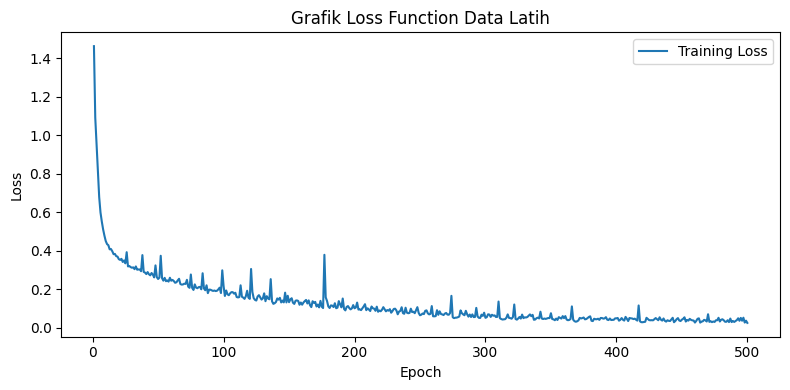

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, len(mlp_turning.losses) + 1), mlp_turning.losses, label='Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Grafik Loss Function Data Latih")
plt.legend()
plt.tight_layout()
plt.show()


- Ini hasil loss function untuk turning hyperparameter menggunakan data latih yang dilakukan penanganan oversampling SMOTE

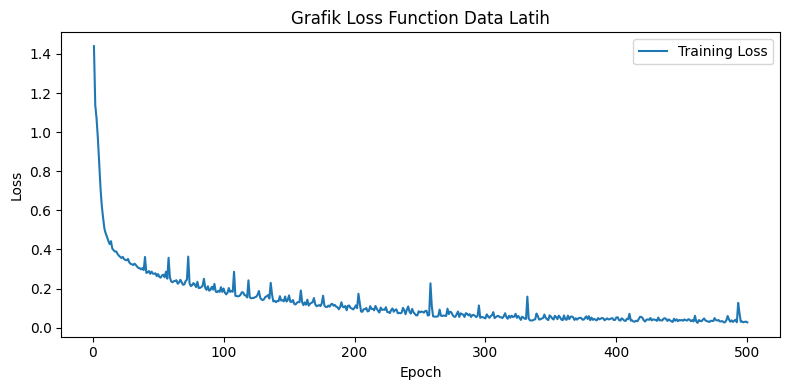

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, len(mlp_turning.losses) + 1), mlp_turning.losses, label='Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Grafik Loss Function Data Latih")
plt.legend()
plt.tight_layout()
plt.show()

####2. Evaluasi model pada data latih

- Ini hasil evaluasi model pada data latih untuk turning hyperparameter menggunakan data latih yang tidak dilakukan penanganan oversampling SMOTE

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Hitung metrik evaluasi
conf_matrix = confusion_matrix(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)

# Cetak hasil
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)
print(f"Accuracy Score: {acc:.4f}")


Confusion Matrix:
[[4733    0    0    0    0    0    0    0]
 [   0  124    1    0    0    0    0    0]
 [   1    2 2417    2    2    3    2    0]
 [   0    2    8 5206   22    9    2    2]
 [   0    0    6   22 6734   37    4    7]
 [   0    1    3    3   10 4862   15   15]
 [   0    0    1    0    9   18 3047   13]
 [   0    0    0    0    1   11   18 3005]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       0.96      0.99      0.98       125
           2       0.99      1.00      0.99      2429
           3       0.99      0.99      0.99      5251
           4       0.99      0.99      0.99      6810
           5       0.98      0.99      0.99      4909
           6       0.99      0.99      0.99      3088
           7       0.99      0.99      0.99      3035

    accuracy                           0.99     30380
   macro avg       0.99      0.99      0.99     30380
weighted avg     

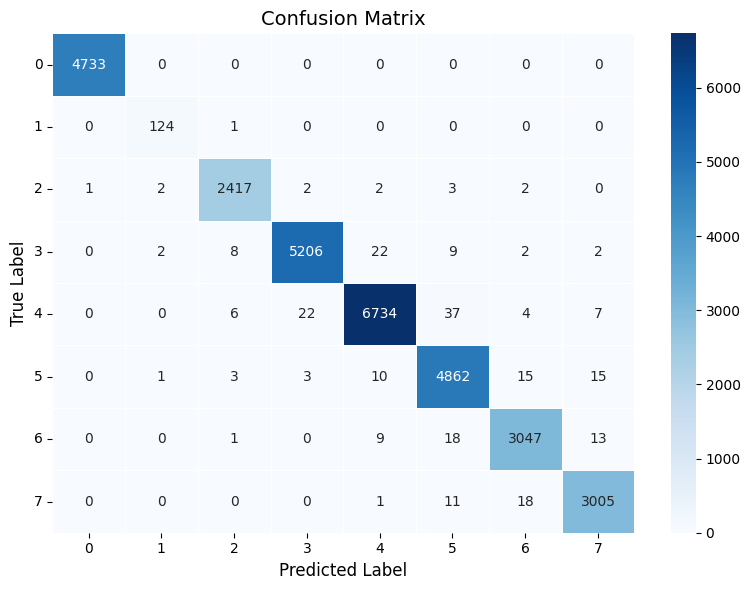

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Plot heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=True)

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


- Ini hasil hasil evaluasi model pada data latih untuk turning hyperparameter menggunakan data latih yang dilakukan penanganan oversampling SMOTE

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Hitung metrik evaluasi
conf_matrix = confusion_matrix(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)

# Cetak hasil
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)
print(f"Accuracy Score: {acc:.4f}")


Confusion Matrix:
[[4733    0    0    0    0    0    0    0]
 [   0  125    0    0    0    0    0    0]
 [   0    4 2414    5    4    2    0    0]
 [   0    0   13 5199   32    5    2    0]
 [   0    0    1   20 6758   21    6    4]
 [   0    0    0    6   21 4849   20   13]
 [   0    0    0    4   12   27 3024   21]
 [   0    0    0    1    3    6    5 3020]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       0.97      1.00      0.98       125
           2       0.99      0.99      0.99      2429
           3       0.99      0.99      0.99      5251
           4       0.99      0.99      0.99      6810
           5       0.99      0.99      0.99      4909
           6       0.99      0.98      0.98      3088
           7       0.99      1.00      0.99      3035

    accuracy                           0.99     30380
   macro avg       0.99      0.99      0.99     30380
weighted avg     

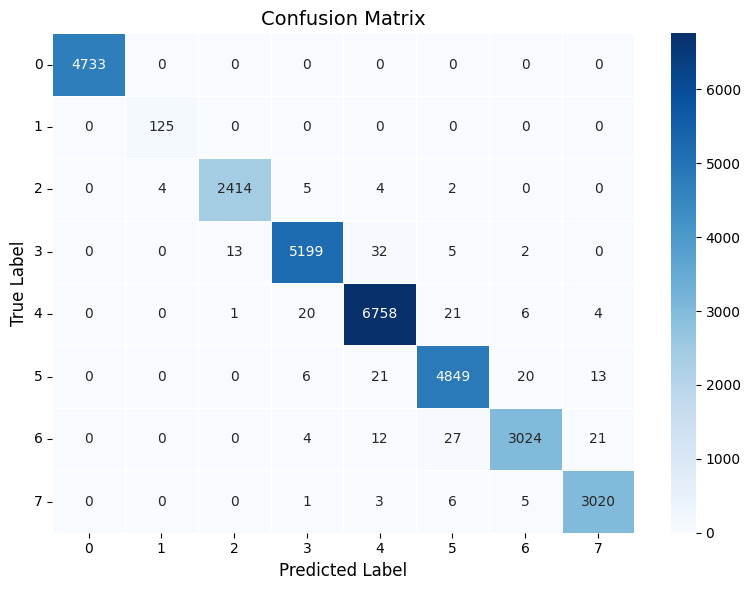

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Plot heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=True)

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

####3. Klasifikasi menggunakan data uji

- Ini hasil pengklasifikasian pada data uji untuk turning hyperparameter menggunakan data latih yang tidak dilakukan penanganan oversampling SMOTE

In [ ]:
y_test_pred = mlp_turning.predict(X_test)

df_test_pred = pd.DataFrame(X_test)
df_test_pred['Prediksi_Gol_UKT'] = y_test_pred
df_test_pred['Asli_Gol_UKT'] = y_test
df_test_pred.insert(0, "No", range(1, len(df_test_pred) + 1))

df_test_pred.to_excel("Hasil_Klasifikasi_Data_Uji.xlsx", index=False)
print("File 'Hasil_Klasifikasi_Data_Uji.xlsx' berhasil disimpan.")

File 'Hasil_Klasifikasi_Data_Uji.xlsx' berhasil disimpan.


In [ ]:
import pandas as pd

df = pd.read_excel('Hasil_Klasifikasi_Data_Uji.xlsx')
# Buat dataframe hasil klasifikasi
df_test_pred = pd.DataFrame(X_test)
df_test_pred['Prediksi_Gol_UKT'] = y_test_pred
df_test_pred['Asli_Gol_UKT'] = y_test

# Tampilkan 10 data pertama
print("Tabel 10 Data Pertama Hasil Klasifikasi Data Uji:")
print(df_test_pred.head(10))

Tabel 10 Data Pertama Hasil Klasifikasi Data Uji:
     0    1    2    3    4    5    6         7         8         9         10  \
0  0.0  0.0  0.0  1.0  0.0  1.0  1.0 -0.391212  0.038422  0.154278   0.000000   
1  1.0  1.0  1.0  1.0  1.0  1.0  1.0 -0.330538  0.783927  2.000000  13.000000   
2  5.0  2.0  7.0  0.0  1.0  1.0  1.0 -0.209190  1.092428  3.960776  -0.526389   
3  1.0  0.0  3.0  0.0  1.0  1.0  2.0 -0.360875  0.497590  1.793126  -0.126842   
4  3.0  0.0  2.0  0.0  0.0  1.0  1.0 -0.391212  0.368019  1.314938  -0.227576   
5  3.0  1.0  3.0  1.0  1.0  1.0  1.0 -0.163684  0.378203  1.400427   0.213773   
6  3.0  0.0  3.0  0.0  1.0  0.0  2.0 -0.360875  0.000000  2.000000   0.000000   
7  0.0  1.0  2.0  0.0  1.0  1.0  0.0 -0.436718  3.000000  1.134877   0.080928   
8  3.0  3.0  3.0  0.0  1.0  1.0  1.0  0.144542  0.687386  2.590421   0.167516   
9  0.0  0.0  6.0  0.0  0.0  1.0  1.0  0.239825  0.561918  2.049458  -0.177342   

         11        12        13   14  Prediksi_Gol_UKT  As

- Ini hasil pengklasifikasian pada data uji untuk turning hyperparameter menggunakan data latih yang dilakukan penanganan oversampling SMOTE

In [ ]:
y_test_pred = mlp_turning.predict(X_test)

df_test_pred = pd.DataFrame(X_test)
df_test_pred['Prediksi_Gol_UKT'] = y_test_pred
df_test_pred['Asli_Gol_UKT'] = y_test
df_test_pred.insert(0, "No", range(1, len(df_test_pred) + 1))

df_test_pred.to_excel("Hasil_Klasifikasi_Data_Uji.xlsx", index=False)
print("File 'Hasil_Klasifikasi_Data_Uji.xlsx' berhasil disimpan.")

File 'Hasil_Klasifikasi_Data_Uji.xlsx' berhasil disimpan.


In [ ]:
import pandas as pd

df = pd.read_excel('Hasil_Klasifikasi_Data_Uji.xlsx')
# Buat dataframe hasil klasifikasi
df_test_pred = pd.DataFrame(X_test)
df_test_pred['Prediksi_Gol_UKT'] = y_test_pred
df_test_pred['Asli_Gol_UKT'] = y_test

# Tampilkan 10 data pertama
print("Tabel 10 Data Pertama Hasil Klasifikasi Data Uji:")
print(df_test_pred.head(10))

Tabel 10 Data Pertama Hasil Klasifikasi Data Uji:
     0    1    2    3    4    5    6         7         8         9         10  \
0  0.0  0.0  0.0  1.0  0.0  1.0  1.0 -0.391212  0.038422  0.154278   0.000000   
1  1.0  1.0  1.0  1.0  1.0  1.0  1.0 -0.330538  0.783927  2.000000  13.000000   
2  5.0  2.0  7.0  0.0  1.0  1.0  1.0 -0.209190  1.092428  3.960776  -0.526389   
3  1.0  0.0  3.0  0.0  1.0  1.0  2.0 -0.360875  0.497590  1.793126  -0.126842   
4  3.0  0.0  2.0  0.0  0.0  1.0  1.0 -0.391212  0.368019  1.314938  -0.227576   
5  3.0  1.0  3.0  1.0  1.0  1.0  1.0 -0.163684  0.378203  1.400427   0.213773   
6  3.0  0.0  3.0  0.0  1.0  0.0  2.0 -0.360875  0.000000  2.000000   0.000000   
7  0.0  1.0  2.0  0.0  1.0  1.0  0.0 -0.436718  3.000000  1.134877   0.080928   
8  3.0  3.0  3.0  0.0  1.0  1.0  1.0  0.144542  0.687386  2.590421   0.167516   
9  0.0  0.0  6.0  0.0  0.0  1.0  1.0  0.239825  0.561918  2.049458  -0.177342   

         11        12        13   14  Prediksi_Gol_UKT  As

####4. Evaluasi model pada data uji

- Ini hasil evaluasi model pada data uji untuk turning hyperparameter menggunakan data latih yang tidak dilakukan penanganan oversampling SMOTE

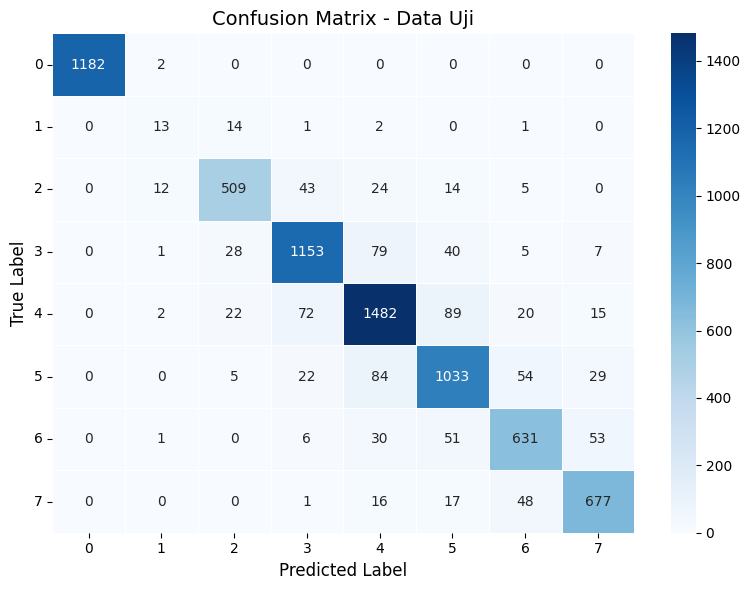


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1184
           1       0.42      0.42      0.42        31
           2       0.88      0.84      0.86       607
           3       0.89      0.88      0.88      1313
           4       0.86      0.87      0.87      1702
           5       0.83      0.84      0.84      1227
           6       0.83      0.82      0.82       772
           7       0.87      0.89      0.88       759

    accuracy                           0.88      7595
   macro avg       0.82      0.82      0.82      7595
weighted avg       0.88      0.88      0.88      7595

Accuracy Score: 0.8795


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Baca file hasil klasifikasi data uji
df_uji = pd.read_excel('Hasil_Klasifikasi_Data_Uji.xlsx')

# Ambil kolom target asli dan prediksi
y_test = df_uji["Asli_Gol_UKT"]
y_test_pred = df_uji["Prediksi_Gol_UKT"]

# === Confusion Matrix Heatmap ===
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=True)
plt.title('Confusion Matrix - Data Uji', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred):.4f}")


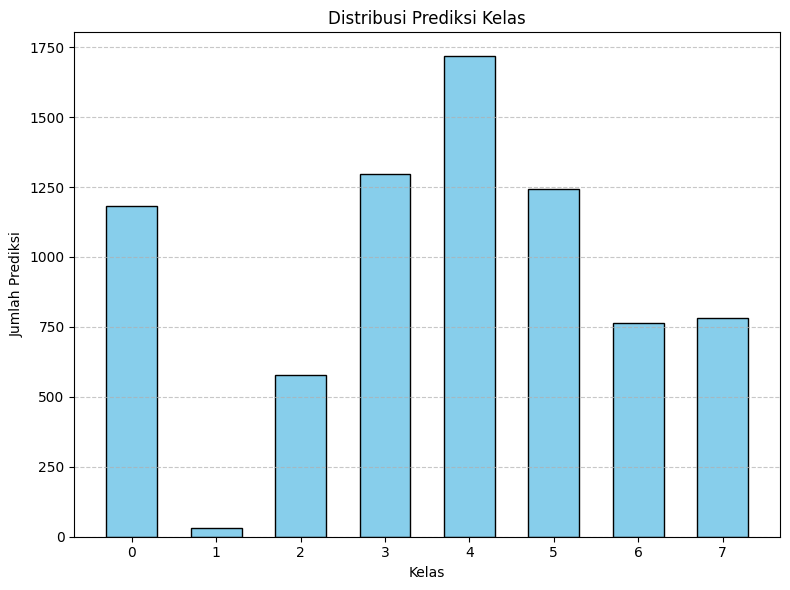

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hitung jumlah prediksi per kelas
classes, counts = np.unique(y_test_pred, return_counts=True)

bar_width = 0.6
positions = np.arange(len(classes))

plt.figure(figsize=(8, 6))
plt.bar(positions, counts, width=bar_width, edgecolor='black', color='skyblue')

# Label dan tampilan
plt.xticks(positions, classes)
plt.title("Distribusi Prediksi Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Prediksi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Ini hasil evaluasi model pada data uji untuk turning hyperparameter menggunakan data latih yang dilakukan penanganan oversampling SMOTE

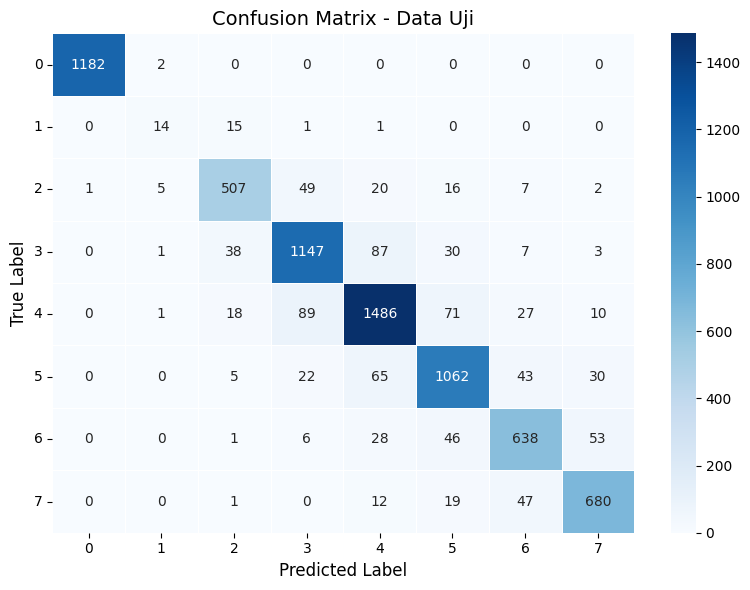


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1184
           1       0.61      0.45      0.52        31
           2       0.87      0.84      0.85       607
           3       0.87      0.87      0.87      1313
           4       0.87      0.87      0.87      1702
           5       0.85      0.87      0.86      1227
           6       0.83      0.83      0.83       772
           7       0.87      0.90      0.88       759

    accuracy                           0.88      7595
   macro avg       0.85      0.83      0.84      7595
weighted avg       0.88      0.88      0.88      7595

Accuracy Score: 0.8843


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Baca file hasil klasifikasi data uji
df_uji = pd.read_excel('Hasil_Klasifikasi_Data_Uji.xlsx')

# Ambil kolom target asli dan prediksi
y_test = df_uji["Asli_Gol_UKT"]
y_test_pred = df_uji["Prediksi_Gol_UKT"]

# === Confusion Matrix Heatmap ===
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=True)
plt.title('Confusion Matrix - Data Uji', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# === Cetak teks report & akurasi (opsional) ===
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred):.4f}")


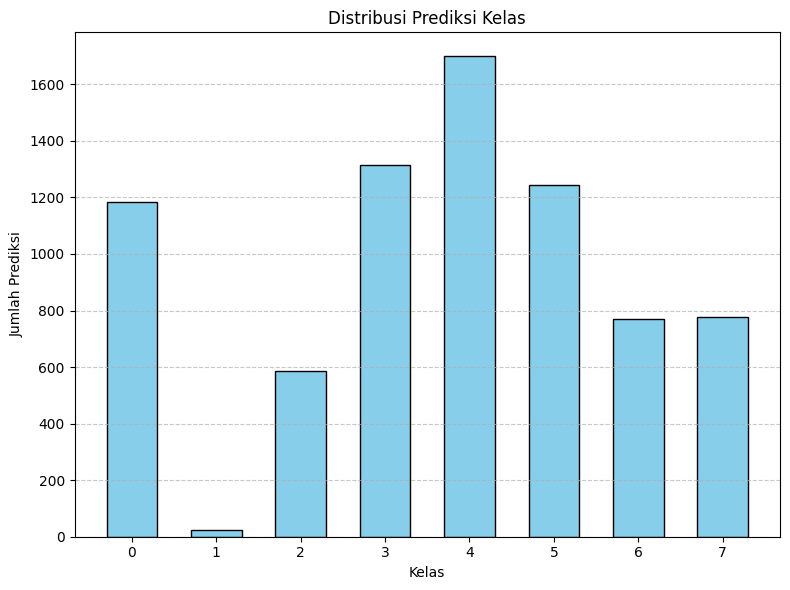

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hitung jumlah prediksi per kelas
classes, counts = np.unique(y_test_pred, return_counts=True)

# Tentukan posisi batang dan lebar
bar_width = 0.6  # Bisa kamu ubah untuk mengatur jarak antar batang
positions = np.arange(len(classes))

# Buat bar plot
plt.figure(figsize=(8, 6))
plt.bar(positions, counts, width=bar_width, edgecolor='black', color='skyblue')

# Label dan tampilan
plt.xticks(positions, classes)
plt.title("Distribusi Prediksi Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Prediksi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


####5. Grafik perbandingan hasil akurasi model antara data latih dengan data uji

- Ini grafik perbandingan hasil akurasi model antara data latih dengan data uji untuk turning hyperparameter menggunakan data latih yang tidak dilakukan penanganan oversampling SMOTE

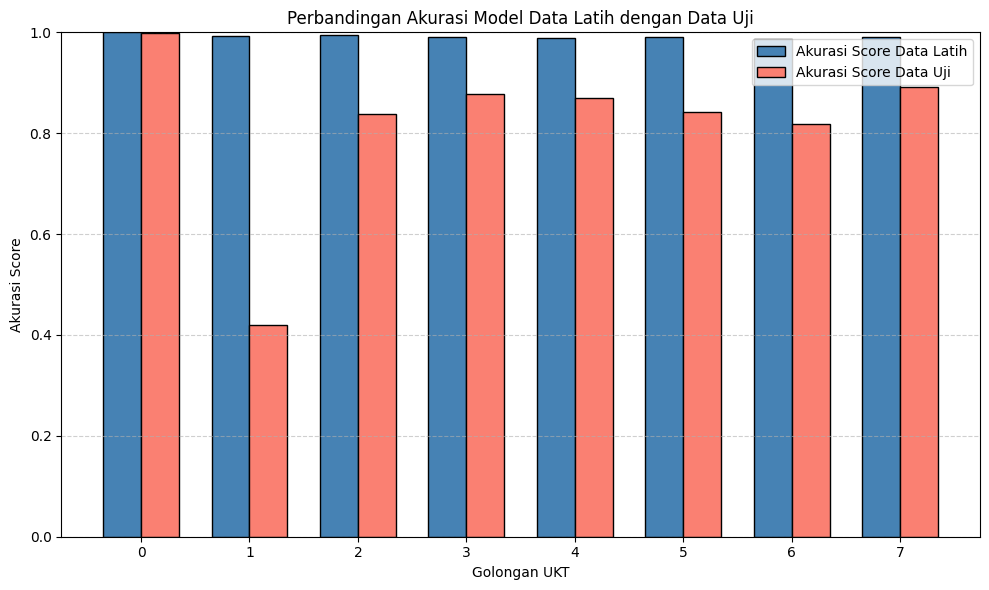

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dapatkan semua label kelasunik
all_classes = np.union1d(np.unique(y_train), np.unique(y_test))

# Inisialisasi array akurasi
train_accuracy_per_class = []
test_accuracy_per_class = []

# Hitung akurasi per kelas
for cls in all_classes:
    # Data latih
    idx_train = (y_train == cls)
    correct_train = np.sum(y_train_pred[idx_train] == y_train[idx_train])
    total_train = np.sum(idx_train)
    acc_train = correct_train / total_train if total_train > 0 else 0
    train_accuracy_per_class.append(acc_train)

    # Data uji
    idx_test = (y_test == cls)
    correct_test = np.sum(y_test_pred[idx_test] == y_test[idx_test])
    total_test = np.sum(idx_test)
    acc_test = correct_test / total_test if total_test > 0 else 0
    test_accuracy_per_class.append(acc_test)

# Konversi ke array
train_accuracy_per_class = np.array(train_accuracy_per_class)
test_accuracy_per_class = np.array(test_accuracy_per_class)

# Plot
bar_width = 0.35
positions = np.arange(len(all_classes))

plt.figure(figsize=(10, 6))
plt.bar(positions - bar_width/2, train_accuracy_per_class, width=bar_width, label='Akurasi Score Data Latih', color='steelblue', edgecolor='black')
plt.bar(positions + bar_width/2, test_accuracy_per_class, width=bar_width, label='Akurasi Score Data Uji', color='salmon', edgecolor='black')

plt.xticks(positions, all_classes)
plt.ylim(0, 1.0)
plt.ylabel("Akurasi Score")
plt.xlabel("Golongan UKT")
plt.title("Perbandingan Akurasi Model Data Latih dengan Data Uji")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- Ini grafik perbandingan hasil akurasi model antara data latih dengan data uji untuk turning hyperparameter menggunakan data latih yang dilakukan penanganan oversampling SMOTE

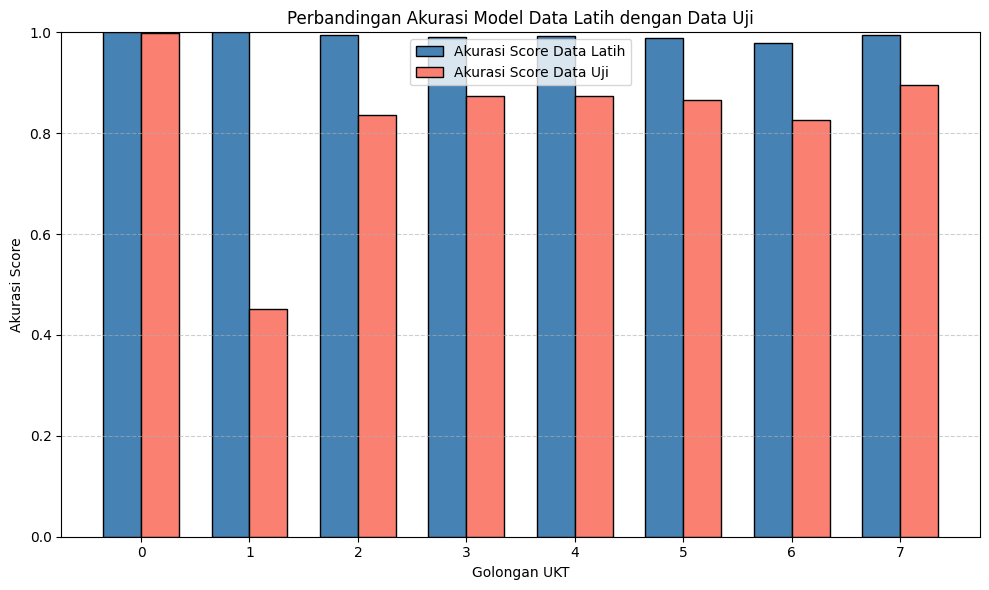

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dapatkan semua label kelasunik
all_classes = np.union1d(np.unique(y_train), np.unique(y_test))

# Inisialisasi array akurasi
train_accuracy_per_class = []
test_accuracy_per_class = []

# Hitung akurasi per kelas
for cls in all_classes:
    # Data latih
    idx_train = (y_train == cls)
    correct_train = np.sum(y_train_pred[idx_train] == y_train[idx_train])
    total_train = np.sum(idx_train)
    acc_train = correct_train / total_train if total_train > 0 else 0
    train_accuracy_per_class.append(acc_train)

    # Data uji
    idx_test = (y_test == cls)
    correct_test = np.sum(y_test_pred[idx_test] == y_test[idx_test])
    total_test = np.sum(idx_test)
    acc_test = correct_test / total_test if total_test > 0 else 0
    test_accuracy_per_class.append(acc_test)

# Konversi ke array
train_accuracy_per_class = np.array(train_accuracy_per_class)
test_accuracy_per_class = np.array(test_accuracy_per_class)

# Plot
bar_width = 0.35
positions = np.arange(len(all_classes))

plt.figure(figsize=(10, 6))
plt.bar(positions - bar_width/2, train_accuracy_per_class, width=bar_width, label='Akurasi Score Data Latih', color='steelblue', edgecolor='black')
plt.bar(positions + bar_width/2, test_accuracy_per_class, width=bar_width, label='Akurasi Score Data Uji', color='salmon', edgecolor='black')

plt.xticks(positions, all_classes)
plt.ylim(0, 1.0)
plt.ylabel("Akurasi Score")
plt.xlabel("Golongan UKT")
plt.title("Perbandingan Akurasi Model Data Latih dengan Data Uji")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##F. KESIMPULAN

Berdasarkan hasil hasil akurasi pada pengujian model, dapat disimpulkan bahwa penggunaan data inbalance SMOTE pada penelitian ini tidak memiliki pengaruh secara signifikan terhadap hasil akurasi model jika dilihat berdasarkan hasil akurasi pada pengujian model antara data pelatihan tanpa penanganan SMOTE dengan data pelatihan menggunakan penanganan SMOTE memiliki hasil akurasi yang tidak jauh berbeda, yaitu sebesar 88%. Selain itu, tantangan inputasi dari nilai hilang menggunakan autoencoder berhasil dilakukan jika dilihat dari hasil uji regresi dan hasil klasifikasi model golongan UKT yang memiliki nilai akurasi model cukup besar dan hasil akurasi model antara data latih dengan data uji memiliki selisih sebesar 11%. Hal ini menunjukan bahwa autoencoder berhasil meningkatkan kualitas data latih dan berdampak ke hasil akurasi model. Selain itu, model MLP pun berhasil belajar dengan baik pada pelatihan model sehingga model MLP dapat melakukan klasifikasi dengan baik dan memiliki hasil akurasi model yang maksimal.